# Выпускной проект: "Анализ оттока клиентов банка"

**Основная цель проекта - используя предоставленный банком датасет, выявить сегменты клиентов, которые склонны уходить из банка.**
**Датасет `bank_scrooge.csv` содержит следующую информацию о клиентах:**

`USERID` — идентификатор пользователя,

`score` — баллы кредитного скоринга,

`city` — город (Ярославль, Ростов, Рыбинск),

`gender` — пол,

`age` — возраст,

`equity` — количество баллов собственности,

`balance` — баланс на счёте,

`products` — количество продуктов, которыми пользуется клиент,

`credit_card` — есть ли кредитная карта (1 - есть кредитная карта, 0 - нет кредитной карты),

`last_activity` — активный клиент (1 - клиент активный, 0 - клиент неактивный),

`EST_SALARY` — оценочный доход клиента,

`сhurn` — признак оттока (1 - клиент ушел, 0 - клиент остался)

**План выполнения проекта:**

**1. Выполнить загрузку, первичный просмотр и подготовку датасета к работе:**

    1.1. Оценить объем данных, формат столбцов, количество пропущенных значений. Привести названия столбцов к нижнему регистру. 
    
    1.2. Проанализировать, чем могут быть вызваны пропуски и решить стоит ли их заполнять, и если да - то чем.
    
    1.3. Проверить датасет на наличие явных и неявных дубликатов. Удалить дубликаты, если они присутствуют.
    
    
**2. Провести исследовательский анализ данных:**

    2.1. Проанализировать, какова доля "отточных" пользователей в группах, разделенных по категориальным признакам (пол, город, количество баллов собственности, количество банковских продуктов клиента, наличие у клиента кредитной карты, активности клиента). Сделать вывод о том, какие категории клиентов демонстрируют повышенный отток.
    
    2.2. Проанализировать долю "отточных" пользователей по непрерывным признакам (возраст, кредитный скоринг, баланс на счете, ежемесячный доход). Определить какие интервалы непрерывных признаков связаны с повышенным оттоком клиентов. 
    
    2.3. Составить портреты типичных клиентов, которые остаются в банке, и тех, кто уходит из банка. Для этого определить медианные значения непрерывных и модальные значения категориальных признаков в группах ушедших и оставшихся клиентов. Составить таблицу таких признаков и в отдельном столбце привести различия между группами по непрерывным, дискретным признакам в процентах.
    
    2.4. Выполнить корреляционный анализ, используя метод Phik, и оценить какие признаки демонстрируют наиболее сильную связь с оттоком клиентов.    
    
**3. Выполнить проверку статистических гипотез о том, что:**

    3.1. Ежемесячный доход ушедших и оставшихся клиентов различается.
    
    3.2. Доли ушедших клиентов в группах с кредитной картой и без кредитной карты значимо различаются.
    
    3.3. Доли ушедших клиентов среди мужчин и женщин значимо различаются.
    
    Для каждой гипотезы обосновать выбор используемого статистического критерия.
        
**4. Подвести промежуточные итоги по исследовательскому анализу данных и проверке статистических гипотез.**

**5. Выполнить сегментацию пользователей, используя результаты, полученные на этапе исследовательского анализа данных. Выделить три сегмента клиентов, в которых отток оказывается существенно выше, чем в среднем по банку. Сегменты могут пересекаться между собой не более чем по одному признаку.**

**6. Выполнить приоритизацию сегментов, принимая во внимание такие факторы как доля "отточных" пользователей и общее число пользователей в сегментах (т.е. массовость сегмента).**

**7. По результатам выполненного анализа подготовить развернутые рекомендации для снижения оттока клиентов в выделенных сегментах.**

## Первичный анализ датасета

**Перед тем как выполнять загрузку данных в датафрейм, установим библиотеку `Phik`, которая будет нам нужна для оценки корреляций:**

In [1]:
!pip install phik


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Импортируем необходимые библиотеки:**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

import phik
from phik.report import plot_correlation_matrix
from phik import report

import statistics

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro
from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

**Установим единый стиль для графиков, которые будем строить в процессе выполнения проекта:**

In [3]:
sns.set_palette("tab10")
sns.set_style("whitegrid")

### Первичный просмотр и подготовка датасета к работе

**Загрузим данные в датафрейм `df`:**

In [4]:
df = pd.read_csv('bank_scrooge.csv')

In [5]:
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


**В датасете 12 столбцов и 10 тысяч строк. Пропуски присутствуют в двух столбцах - `age` и `balance` (заполнено 9974 и 7705 строк, соответственно). Ими займемся в одном из следующих пунктов.**

**Для удобства последующей работы приведем все названия столбцов к нижнему регистру:**

In [7]:
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

**И переименуем столбец `userid` в `user_id`:**

In [8]:
df = df.rename(columns={'userid':'user_id'})

### Работа с дубликатами

**Сначала проверим, есть ли в датафрейме полностью дублирующиеся строчки:**

In [9]:
df.duplicated().sum()

0

**Полных дубликатов нет. Теперь посмотрим, нет ли двойных обозначений для названий городов и пола клиентов:**

In [10]:
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [11]:
df['gender'].unique()

array(['Ж', 'М'], dtype=object)

**Обратимся к столбцу `user_id` и проверим, нет ли дубликатов по идентификатору пользователя:**

In [12]:
df['user_id'].duplicated().sum()

73

**Дубликаты по идентификатору пользователя присутствуют. Получим список дублирующихся идентификаторов:**

In [13]:
duplicated_ids = df[df['user_id'].duplicated()]['user_id'].reset_index(drop=True)
duplicated_ids

0     190253
1     210662
2     131419
3     187635
4     220816
       ...  
68    124450
69    168998
70    140934
71    217412
72    175730
Name: user_id, Length: 73, dtype: int64

**Выберем из датсета строки, соответствующие дублирующимся идентификаторам, и посмотрим действительно ли за одинаковыми идентификаторами скрываются одни и те же люди:**

In [14]:
df.query('user_id in @duplicated_ids').sort_values(by='user_id', ascending=True).head(20)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


**Судя по полученной таблице, за одинаковыми идентификаторами "прячутся" разные люди. Два одинаковых идентификатора всегда принадлежат клиентам, живущим в разных городах (Ярославле и Рыбинске). Из этого можно сделать предположение, что в какой-то момент базы клиентов в банках Ярославля и Рыбинска были изолированы друг от друга, и из-за этого разным клиентам были присвоены одинаковые номера. Целесообразно будет оставить дубликаты по `user_id` во избежание утраты ценной информации о клиентах.** 

### Работа с пропусками

**Как мы выяснили выше, в двух столбцах датасета имеются пропуски - `age` и `balance`. В первом случае пропусков немного (всего 26, а это менее чем 0.5%), во втором - более 2000, что составляет более 20% от общего объема датасета. Чтобы понять природу этих пропусков создадим временный столбец `balance_absent`, в который запишем `True` если значение `balance` пропущено и `False` если оно не пропущено. Затем рассчитаем средние/медианы количественных и моды качественных признаков в группах, где значения баланса пропущены и не пропущены и сравним их. Если обнаружатся существенные различия мер центральной тенденции между группами с пропущенными и непропущенными значениями по одному или нескольким признакам, то, вероятно, что пропуски зависят от значений этих признаков. Чтобы оценить, действительно ли есть связь между пропусками и значениями этих признаков, рассчитаем корреляцию между последними и столбцом `balance_absent`, используя метод `Phik`.**
**Начнем с создания столбца `balance_absent`:**

In [15]:
df['balance_absent'] = df['balance'].isna()

In [16]:
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_absent
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,False
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,False
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,True
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,False
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,False


**Создадим сводную таблицу с модами категориальных признаков и средними/медианами количественных признаков для значений `True` и `False`  столбца `balance_absent`:**

In [17]:
pivot = df.pivot_table(index='balance_absent', 
               values=['score','city','gender','age', 'equity','products', 'credit_card', 'last_activity', 'est_salary', 'churn'], 
               aggfunc={'score':'mean', 
                        'age':'mean', 
                        'est_salary':'mean',
                        'city':statistics.mode, 
                        'gender':statistics.mode,
                        'equity':np.median,
                        'products':np.median, 
                        'credit_card':statistics.mode, 
                        'last_activity':statistics.mode,
                        'churn':statistics.mode})
pivot.columns = ['средний возраст', 'мода признака оттока', 'мода города', 'мода признака наличия кредитной карты', 'медиана числа объектов собственности', 
                 'средняя зарплата', 'мода пола', 'мода признака активности', 'медиана количества продуктов', 'средний кредитный рейтинг']
pivot.index = ['баланс указан', 'баланс не указан']
pivot['средний возраст'] = pivot['средний возраст'].astype('float').round()
pivot['средняя зарплата'] = pivot['средняя зарплата'].astype('float').round()
pivot['средний кредитный рейтинг'] = pivot['средний кредитный рейтинг'].astype('float').round()
pivot

,средний возраст,мода признака оттока,мода города,мода признака наличия кредитной карты,медиана числа объектов собственности,средняя зарплата,мода пола,мода признака активности,медиана количества продуктов,средний кредитный рейтинг
баланс указан,43.0,0,Ярославль,1,4,124502.0,Ж,1,2,844.0
баланс не указан,42.0,0,Ярославль,1,0,226310.0,М,1,1,865.0


**Полученная таблица показывает, что меры центральной тенденции для групп пользователей с указанным и не указанным балансом существенно различаются для следующих признаков: числа объектов собственности (4 против 0), зарплаты(124 тыс против 226 тыс), пола (Ж против М), и количества продуктов (2 против 1). Таким образом, пропуски в столбце `balance` могут быть обусловлены этими признаками. Оценим силу связи пропусков в этом столбце с другими параметрами датасета, выполнив анализ коэффициентов корреляции:**

In [18]:
phik_overview = df.drop(columns='user_id').phik_matrix(interval_cols=['score','age', 'balance','est_salary'])

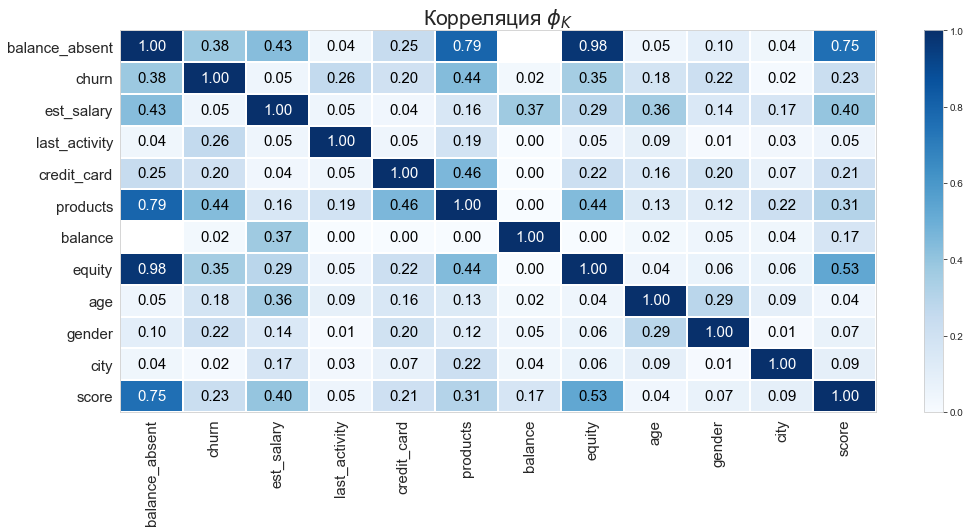

In [19]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'Корреляция $\phi_K$', fontsize_factor=1.5,
                        figsize=(15,7.5))
plt.tight_layout()

**Оценим значимость корреляциий, рассчитав Z-score:**

In [20]:
significance_overview = df.drop(columns='user_id').significance_matrix(interval_cols=['score','age', 'balance','est_salary'])

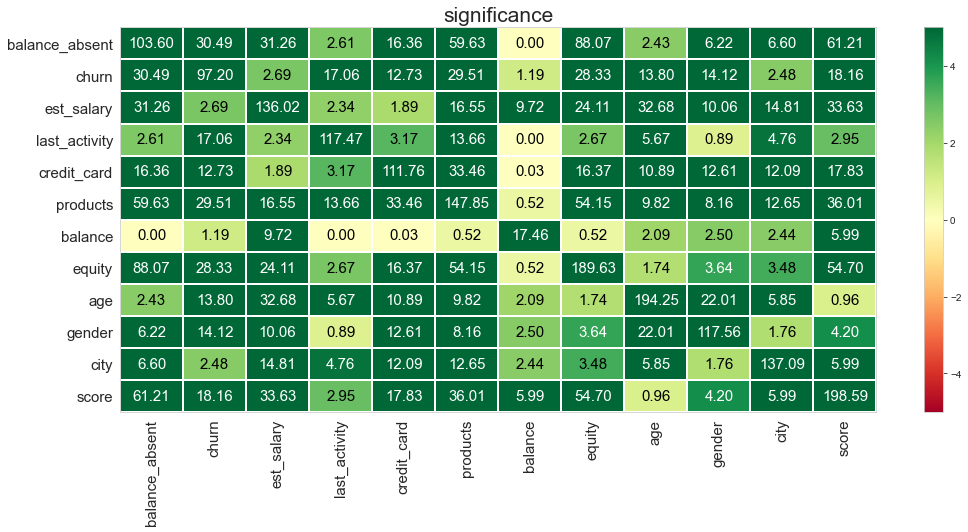

In [21]:
plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='significance', 
                        usetex=False, fontsize_factor=1.5, figsize=(15,7.5))
plt.tight_layout()

**Матрица корреляции указывает на сильную связь отсутствия информации о балансе на счете `balance_absent` с показателями `equity`, `products` и `score` и умеренную по силе связь с показателем `est_salary`. Таким образом, пропуски в столбце `balance` связаны со значениями в других столбцах и присутствуют в датасете не случайно (missing not at random - MNAR). Такие пропуски нельзя отбрасывать или заполнять одним значением, т.к. это может привести к искажению данных** 

**Наиболее верным в случае столбца `balance` представляется решение оставить пропуски незаполненными. Что касается столбца `age`, то: во-первых, число пропусков в нем крайне невелико, во-вторых, матрица корреляции показывает отсутствие сколько-нибудь значимой связи булева столбца `age_absent` с другими показателями. Поэтому оставим пропуски и в столбце `age`.**

**Посмотрим как сильно различаются распределения по доходу и по кредитному скорингу у клиентов с указанным и не указанным балансом:**

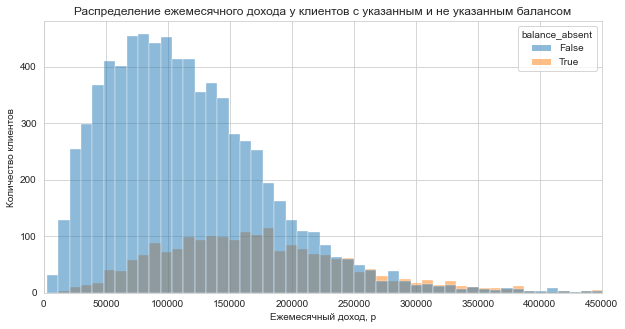

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='est_salary', hue='balance_absent')
plt.title('Распределение ежемесячного дохода у клиентов с указанным и не указанным балансом')
plt.xlabel('Ежемесячный доход, р')
plt.ylabel('Количество клиентов')
plt.xlim(0, 450000)
plt.show()

**Распределение по доходу у клиентов с неуказанным балансом заметно смещено вправо, т.е. эти люди действительно в среднем зарабатывают больше. Теперь взглянем на распределение по скорингу:**

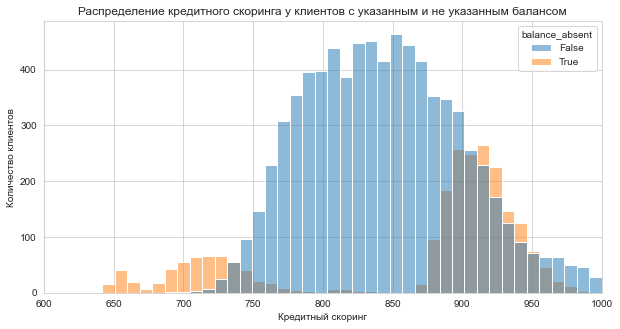

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='score', hue='balance_absent')
plt.title('Распределение кредитного скоринга у клиентов с указанным и не указанным балансом')
plt.xlabel('Кредитный скоринг')
plt.ylabel('Количество клиентов')
plt.xlim(600,1000)
plt.show()

**Здесь метод Phik, похоже, обнаружил нелинейную связь - видно, что те, у кого отсутствуют данные о балансе, разбились на две группы: с низким кредитным скорингом и с высоким. Почему получилось так, что именно у этих групп не указан баланс, можно только догадываться. Однако, очевидно, что отсутствие части данных о балансе именно в этих диапазонах кредитных скорингов (а не пропорционально количеству клиентов с определенным скорингом во всем диапазоне) может приводить к некоторому искажению представления о реальном распределении балансов на счетах клиентов и о связи баланса со скорингом.**

**Вспомогательные столбец `balance_absent` больше нам не понадобится, поэтому удаляем его из датасета:**

In [24]:
df = df.drop(columns=['balance_absent'])
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


## Исследовательский анализ данных

### Анализ доли "отточных" пользователей в группах, сформированных по категориальным/дискретным признакам

**Перед началом работы с категориальными и дискретными числовыми признаками напишем функцию `get_bars`, которая будет создавать сводную таблицу, в строках которой будут категории/дискретные значения признака, а в столбцах - доля отточных пользователей в каждой категории и общее число пользователей в категории. Затем, функция будет строить на основе полученной таблицы две столбчатые диаграммы - одну с распределением числа клиентов по категориям, другую - с показателем доли отточных пользователей в каждой категории:**  

In [25]:
def get_bars(que, dataframe, x_label):
    fig, (ax2, ax1) = plt.subplots(1,2,figsize=(20,7))
    pivot = dataframe.pivot_table(index=que, 
                             values=['churn','user_id'], aggfunc={'churn':'mean', 'user_id':'count'}).reset_index()
    pivot['churn'] = round(pivot['churn']*100, 1)
    mean_churn = round(dataframe['churn'].mean()*100, 1)
    pivot.plot(kind='bar', x=que, y='churn', legend=False, ax=ax1)
    for p in ax1.patches:
        ax1.annotate(s = np.round(p.get_height(), decimals=3),
                xy = (p.get_x()+p.get_width()/2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize = 14)
    ax1.set_title(f'Отток клиентов в разных {que} категориях \n средняя доля ушедших клиентов {round(mean_churn,1)}% показана прерывистой линией', pad=10, fontsize=16)
    ax1.set_ylim(0, pivot['churn'].max()+pivot['churn'].max()*0.1)
    ax1.set_xlabel(x_label, fontsize=14)
    ax1.set_ylabel('Доля ушедших клиентов, %', fontsize=14)
    ax1.tick_params(axis='x', labelsize=14, rotation=0)
    ax1.tick_params(axis='y', labelsize=14, rotation=0)
    ax1.axhline(y=mean_churn, color='purple', linestyle='--', alpha=0.8)
    
    pivot.plot(kind='bar', x=que, y='user_id', legend=False, ax=ax2)
    ax2.set_title(f'Число клиентов в разных {que} категориях', pad=10, fontsize=16)
    for p in ax2.patches:
        ax2.annotate(s = np.round(p.get_height(), decimals=3),
                xy = (p.get_x()+p.get_width()/2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize = 14)
    ax2.set_ylim(0, pivot['user_id'].max()+pivot['user_id'].max()*0.1)    
    ax2.set_xlabel(x_label, fontsize=14)
    ax2.set_ylabel('Число клиентов', fontsize=14)
    ax2.tick_params(axis='x', labelsize=14, rotation=0)
    ax2.tick_params(axis='y', labelsize=14, rotation=0)
    plt.show()
    
    pivot.columns = [x_label, 'Отток, %', 'Общее число клиентов']
    print()
    print(pivot)

**В этом разделе мы также выделим сегменты пользователей которые ассоциируются с повышенным оттоком клиентов. После анализа каждого из пунктов будем добавлять в копию изначального датафрейма `df_copy` столбец, соответствующий названию анализируемого признака, который будет показывать в какой диапазон этого признака попадает клиент - с повышенным риском оттока или нет**

In [26]:
df_copy = df.copy(deep=True)

#### Город проживания клиента

**Посмотрим как различается количество и отток клиентов в разных городах:**

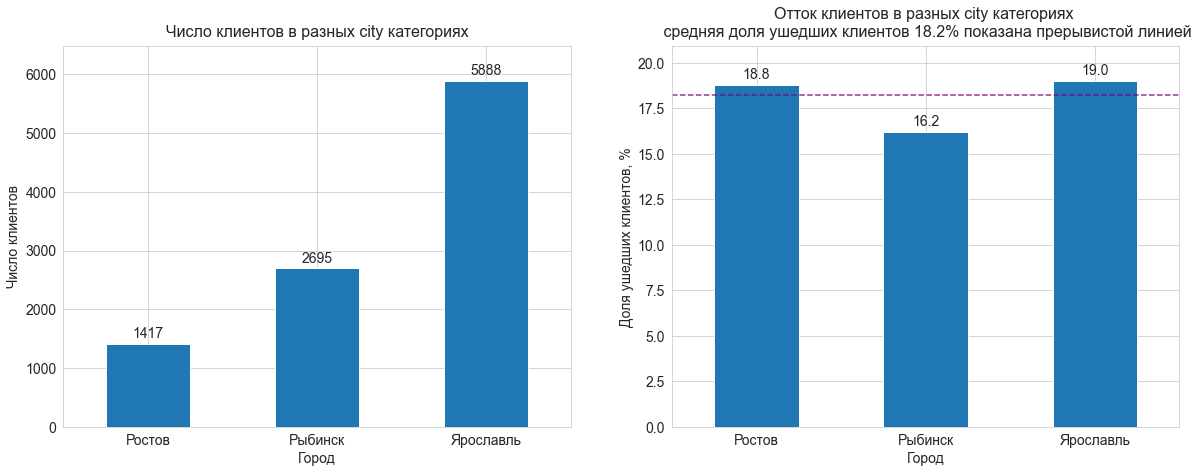


       Город  Отток, %  Общее число клиентов
0     Ростов      18.8                  1417
1    Рыбинск      16.2                  2695
2  Ярославль      19.0                  5888


In [27]:
get_bars('city', df, 'Город')

**Самое большое число клиентов банка в Ярославле (5888), на втором месте - Рыбинск (2695), на третьем - Ростов (1417).  В Ростове и Ярославле показатели оттока выше, чем в среднем по всем городам и составляют 18.8 и 19.0%, соответственно. В Рыбинске отток ниже среднего - 16.2%.** 

**В датафрейм `df_copy` в столбец `city` запишем Ярославль и Ростов для этих городов и `others` для Рыбинска, как для города с низким оттоком:**

In [28]:
def city_churn(df):
    if df['city'] == 'Ростов':
        category = 'Ростов'
    elif df['city'] == 'Ярославль':
        category = 'Ярославль'
    else:
        category = 'others'
    return category

In [29]:
df_copy['city'] = df_copy.apply(city_churn, axis=1)
df_copy.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,others,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,others,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,others,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


#### Число объектов собственности (equity)

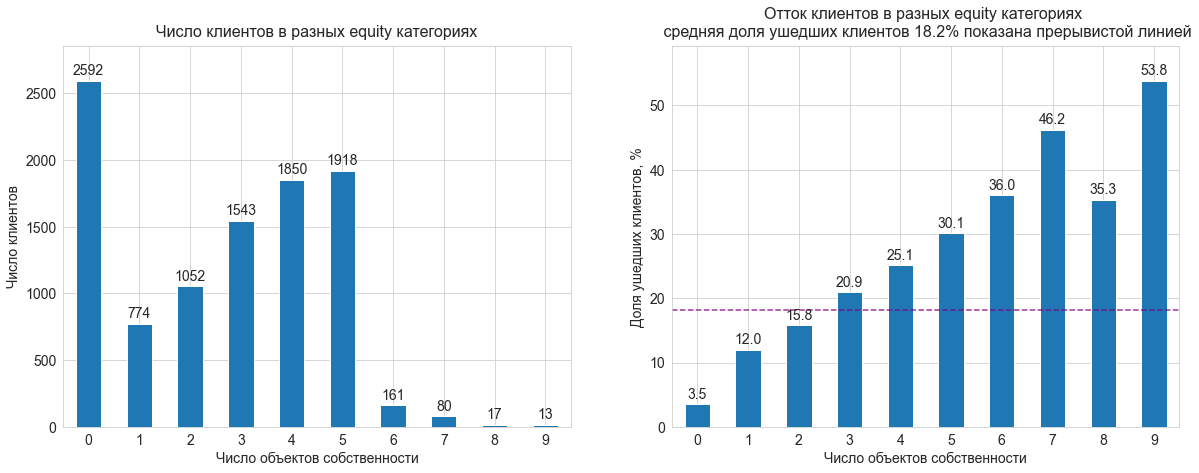


   Число объектов собственности  Отток, %  Общее число клиентов
0                             0       3.5                  2592
1                             1      12.0                   774
2                             2      15.8                  1052
3                             3      20.9                  1543
4                             4      25.1                  1850
5                             5      30.1                  1918
6                             6      36.0                   161
7                             7      46.2                    80
8                             8      35.3                    17
9                             9      53.8                    13


In [30]:
get_bars('equity', df, 'Число объектов собственности')

**Самой многочисленной является группа клиентов, у которых не указано ни одного объекта собственности (2592 человека, около 25%). С одной стороны, эта цифра коррелирует с недавними соцопросами, выявившими, что около 25% жителей России не имеют в собственности жилья. С другой стороны, цифра может быть завышена из-за сокрытия данных людей, имеющих высокий доход.**

**Число клиентов банка владеющих 1-5 объектами собственности возрастает с 774 до 1918 человек по мере увеличения количества этих объектов. Сравнительно невысоко количество клиентов у которых шесть и более объектов в собственности.**

**График оттока показывает, что склонность клиентов покидать банк растет с увеличеним числа объектов собственности. В группах с числом объектов собственности  0, 1  2 клиенты уходят из банка реже среднего (3.5, 12 и 15.8% отточных клиентов, соответственно, при среднем значении 18.2%). Клиенты с 3, 4 и 5-ю объектами в собственности покидают банк чаще среднего (20.9, 25.1 и 30.1%, соответственно). Значения оттока для клиентов с 6 и более объектами собственности нельзя рассматривать как показательные, поскольку число наблюдений небольшое.**  

**В датафрейм `df_copy` в столбец `equity` запишем 3-5 для клиентов с числом объектов собственности от 3 до 5 (сегмент повышенного оттока) и `others` для других клиентов:**

In [31]:
def equity_churn(df):
    if df['equity'] >=3 and df['equity'] <=5:
        category = '3-5 объектов собственности'
    else:
        category = 'others'
    return category

In [32]:
df_copy['equity'] = df_copy.apply(equity_churn, axis=1)
df_copy.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,others,Ж,25.0,others,59214.82,2,0,1,75719.14,1
1,146556,861.0,others,Ж,37.0,3-5 объектов собственности,850594.33,3,1,0,86621.77,0
2,120722,892.0,others,Ж,30.0,others,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,3-5 объектов собственности,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,3-5 объектов собственности,174.00,1,1,0,67353.16,1


**Рассчитаем показатель оттока в выделенных сегментах по числу объектов собственности:**

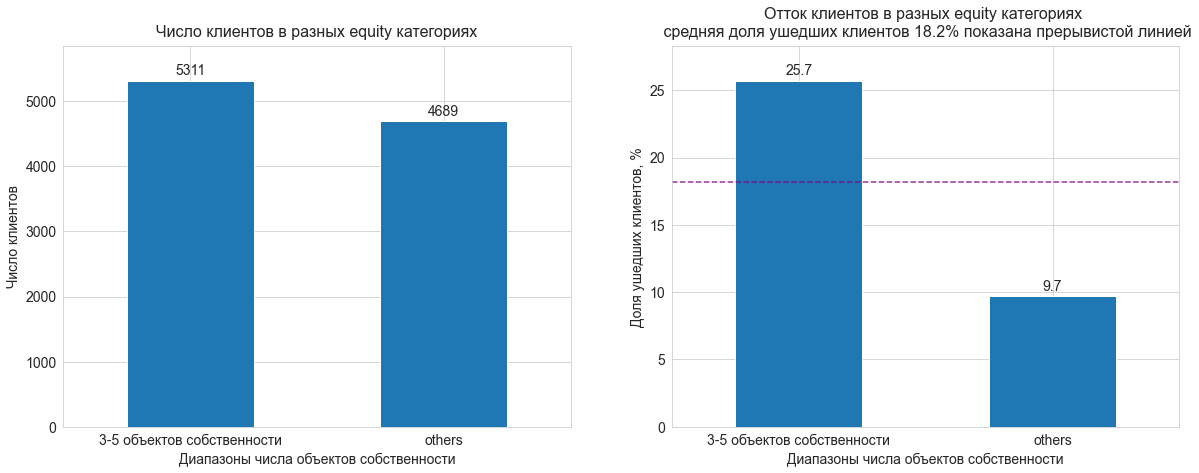


  Диапазоны числа объектов собственности  Отток, %  Общее число клиентов
0             3-5 объектов собственности      25.7                  5311
1                                 others       9.7                  4689


In [33]:
get_bars('equity', df_copy, 'Диапазоны числа объектов собственности')

#### Пол клиента

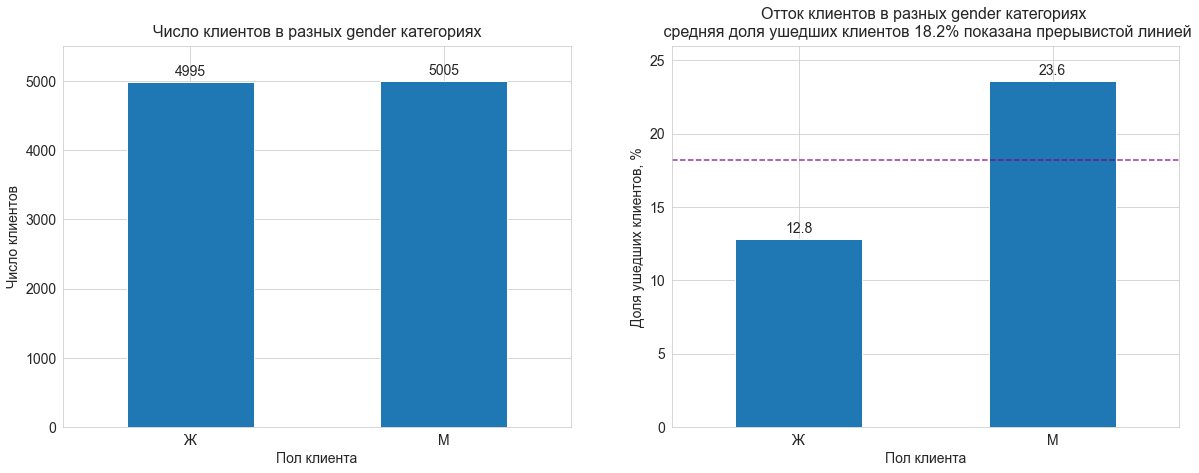


  Пол клиента  Отток, %  Общее число клиентов
0           Ж      12.8                  4995
1           М      23.6                  5005


In [34]:
get_bars('gender', df, 'Пол клиента')

**В предоставленном датасете число клиентов женского и мужского пола различается незначительно (4995 женщин и 5005 мужчин). График оттока показывает, что женщины покидают банк реже среднего (12.8%), а мужчины - чаще среднего (23.6% случаев).**

**В датафрейм `df_copy` в столбец `gender` запишем М для клиентов мужского пола (сегмент повышенного оттока) и `others` для клиентов женского пола (низкий отток):**

In [35]:
def gender_churn(df):
    if df['gender'] == 'М':
        category = 'М'
    else:
        category = 'others'
    return category

In [36]:
df_copy['gender'] = df_copy.apply(gender_churn, axis=1)
df_copy.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,others,others,25.0,others,59214.82,2,0,1,75719.14,1
1,146556,861.0,others,others,37.0,3-5 объектов собственности,850594.33,3,1,0,86621.77,0
2,120722,892.0,others,others,30.0,others,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,others,51.0,3-5 объектов собственности,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,3-5 объектов собственности,174.00,1,1,0,67353.16,1


#### Количество банковских продуктов у клиента

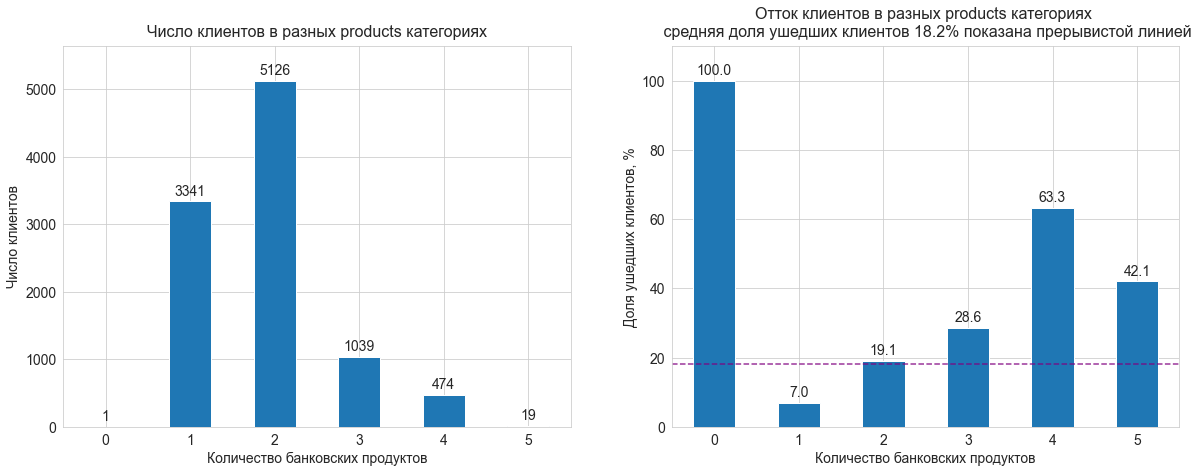


   Количество банковских продуктов  Отток, %  Общее число клиентов
0                                0     100.0                     1
1                                1       7.0                  3341
2                                2      19.1                  5126
3                                3      28.6                  1039
4                                4      63.3                   474
5                                5      42.1                    19


In [37]:
get_bars('products', df, 'Количество банковских продуктов')

**В датасете обнаружился один человек у которого нет ни одного банковского продукта. Такого человека нельзя считать клиентом банка - удалим из датасета строку, содержащую информацию о нем,  и построим графики снова:** 

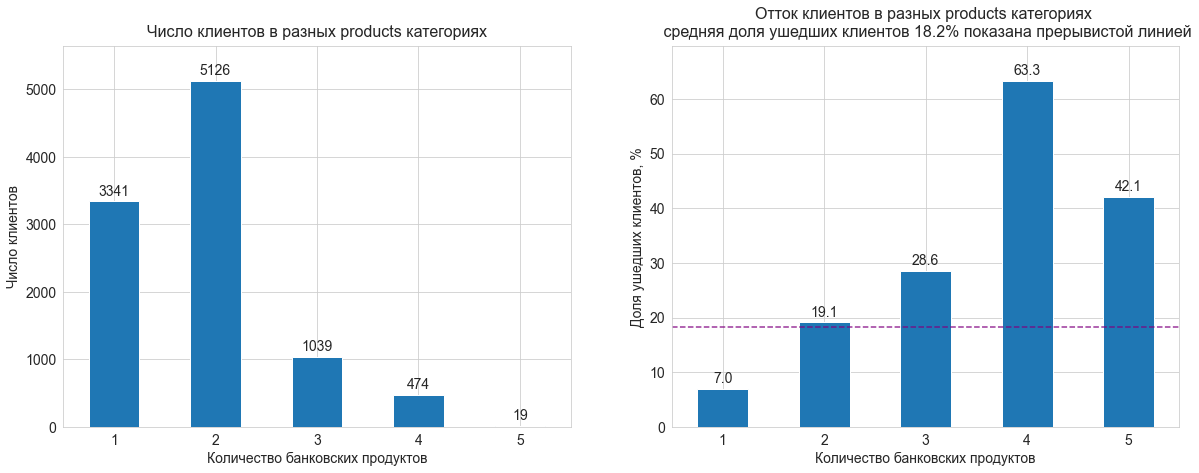


   Количество банковских продуктов  Отток, %  Общее число клиентов
0                                1       7.0                  3341
1                                2      19.1                  5126
2                                3      28.6                  1039
3                                4      63.3                   474
4                                5      42.1                    19


In [38]:
df = df.query('products != 0')
df_copy = df_copy.query('products != 0')
get_bars('products', df, 'Количество банковских продуктов')

**У большинства клиентов банка (5126 человек) - по два продукта, на втором месте группа с одним банковским продуктом (3341 человек), на третьем и четвертом, соответственно, клиенты с тремя и четырьмя банковскими продуктами (1039 и 474 человека). Меьше всего клиентов у которых пять продуктов - всего 19 человек.**

**Показатели оттока увеличиваются с ростом числа продуктов. Наименее склонны покидать банк те, кто пользуется одним продуктом (7% отточности), далее по нарастающей следуют группы с 2, 3 и 4-мя продуктами (19.1, 28.6 и 63.3% отточности). Таким образом, по абсолютной величине мы наблюдаем отток выше среднего для всех клиентов, у кого имеется два и более продуктов банка. Данные отточности по группе клиентов с 5-ю продуктами (42.1%) нельзя считать показательными, поскольку эта группа слишком малочисленна.**

**В датафрейм `df_copy` в столбец `products` запишем 2-4 для клиентов c числом продуктов от 2 до 4 (сегмент повышенного оттока) и `others` для клиентов с другим числом продуктов (низкий отток или недостаточно данных):**

In [39]:
def products_churn(df):
    if df['products'] >= 2 and df['products'] <= 4:
        category = '2-4 продукта'
    else:
        category = 'others'
    return category

In [40]:
df_copy['products'] = df_copy.apply(products_churn, axis=1)
df_copy.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,others,others,25.0,others,59214.82,2-4 продукта,0,1,75719.14,1
1,146556,861.0,others,others,37.0,3-5 объектов собственности,850594.33,2-4 продукта,1,0,86621.77,0
2,120722,892.0,others,others,30.0,others,NaN,others,1,1,107683.34,0
3,225363,866.0,Ярославль,others,51.0,3-5 объектов собственности,1524746.26,2-4 продукта,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,3-5 объектов собственности,174.00,others,1,0,67353.16,1


**Рассчитаем отток по выделенным сегментам количества банковских продуктов:**

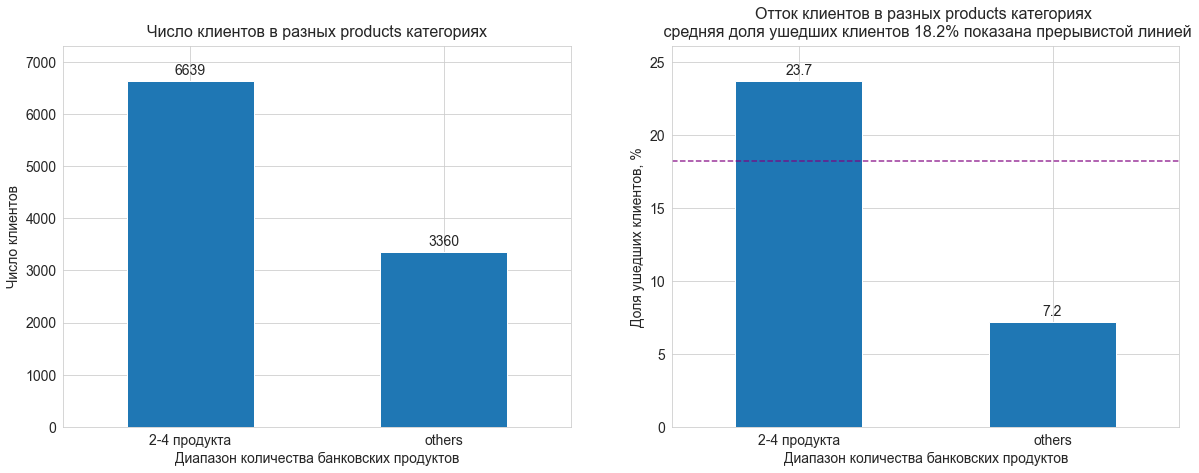


  Диапазон количества банковских продуктов  Отток, %  Общее число клиентов
0                             2-4 продукта      23.7                  6639
1                                   others       7.2                  3360


In [41]:
get_bars('products', df_copy, 'Диапазон количества банковских продуктов')

#### Наличие у клиента кредитной карты

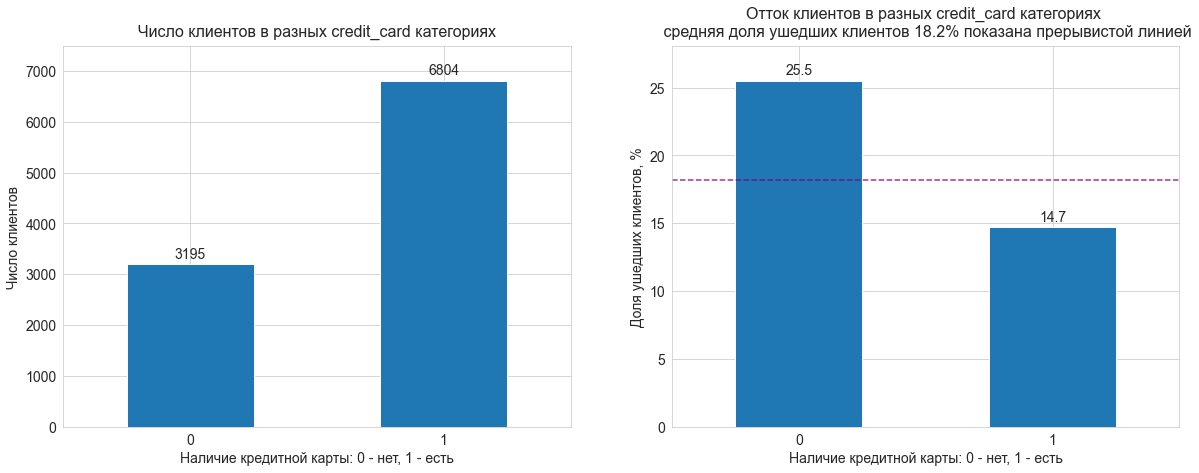


   Наличие кредитной карты: 0 - нет, 1 - есть  Отток, %  Общее число клиентов
0                                           0      25.5                  3195
1                                           1      14.7                  6804


In [42]:
get_bars('credit_card', df, 'Наличие кредитной карты: 0 - нет, 1 - есть')

**У большинства клиентов (6804 человека) есть кредитка, у 3195 - нет. Отток в группе с отсутствующей кредиткой существенно выше, чем в группе обладателей кредитной карты (25.5% против 14.7%) и выше, чем в среднем по датасету.**

**В датафрейм `df_copy` в столбец `credit_card` запишем 'нет кредитной карты' для клиентов без кредитки (сегмент повышенного оттока) и `others` для клиентов с кредитной картой (сегмент низкого оттока):**

In [43]:
def credit_card_churn(df):
    if df['credit_card'] == 0:
        category = 'нет кредитной карты'
    else:
        category = 'others'
    return category

In [44]:
df_copy['credit_card'] = df_copy.apply(credit_card_churn, axis=1)
df_copy.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,others,others,25.0,others,59214.82,2-4 продукта,нет кредитной карты,1,75719.14,1
1,146556,861.0,others,others,37.0,3-5 объектов собственности,850594.33,2-4 продукта,others,0,86621.77,0
2,120722,892.0,others,others,30.0,others,NaN,others,others,1,107683.34,0
3,225363,866.0,Ярославль,others,51.0,3-5 объектов собственности,1524746.26,2-4 продукта,нет кредитной карты,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,3-5 объектов собственности,174.00,others,others,0,67353.16,1


#### Активность клиента в недавнее время

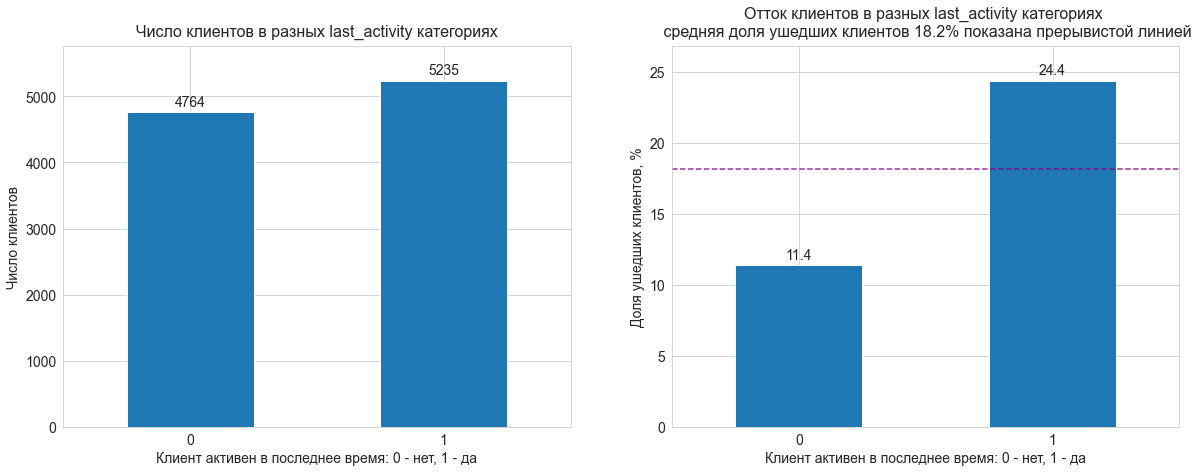


   Клиент активен в последнее время: 0 - нет, 1 - да  Отток, %  \
0                                                  0      11.4   
1                                                  1      24.4   

   Общее число клиентов  
0                  4764  
1                  5235  


In [45]:
get_bars('last_activity', df, 'Клиент активен в последнее время: 0 - нет, 1 - да')

**Количество клиентов в группах активных и неактивных пользователей различается не более чем на 10%: в группе неактивных 4765 человек, среди активных - 5235. Отток среди активных пользователей более чем вдвое превышает отток неактивных пользователей (24.4 и 11.4%, соответственно).**

**В датафрейм `df_copy` в столбец `last_activity` запишем 'активен' для клиентов активных в последнее время (сегмент повышенного оттока) и `others` для клиентов не активных в последнее время (сегмент низкого оттока):**

In [46]:
def last_activity_churn(df):
    if df['last_activity'] == 1:
        category = 'Активен'
    else:
        category = 'others'
    return category

In [47]:
df_copy['last_activity'] = df_copy.apply(last_activity_churn, axis=1)
df_copy.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,others,others,25.0,others,59214.82,2-4 продукта,нет кредитной карты,Активен,75719.14,1
1,146556,861.0,others,others,37.0,3-5 объектов собственности,850594.33,2-4 продукта,others,others,86621.77,0
2,120722,892.0,others,others,30.0,others,NaN,others,others,Активен,107683.34,0
3,225363,866.0,Ярославль,others,51.0,3-5 объектов собственности,1524746.26,2-4 продукта,нет кредитной карты,Активен,174423.53,1
4,157978,730.0,Ярославль,М,34.0,3-5 объектов собственности,174.00,others,others,others,67353.16,1


### Определение интервалов, связанных с повышенным оттоком клиентов, для непрерывных количественных признаков

#### Возраст клиентов

**В начале посмотрим как распределены клиенты по возрастам:**

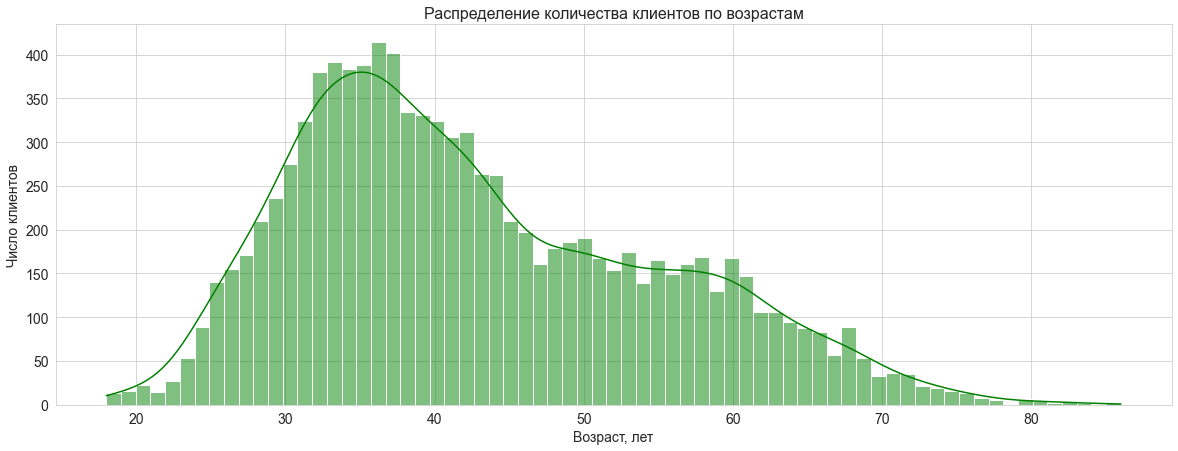

In [48]:
plt.figure(figsize=(20,7))
sns.histplot(data=df, x='age', bins=len(df['age'].unique()), fill=True, kde=True, color='green')
plt.title('Распределение количества клиентов по возрастам', fontsize=16)
plt.xlabel('Возраст, лет', fontsize=14)
plt.ylabel('Число клиентов', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**Распределение показыват, что наиболее массовой возрастной группой клиентов банка являются люди в возрасте 25-50 лет.**
**Теперь рассмотрим распределения по возрастам в разрезе признака ухода клиентов из банка. Построим гистограммы нормированной вероятности для клиентов уйти из банка или остаться в зависимости от возраста. Нормировку выполним отдельно для каждой гистограммы (ушедших и оставшихся).**

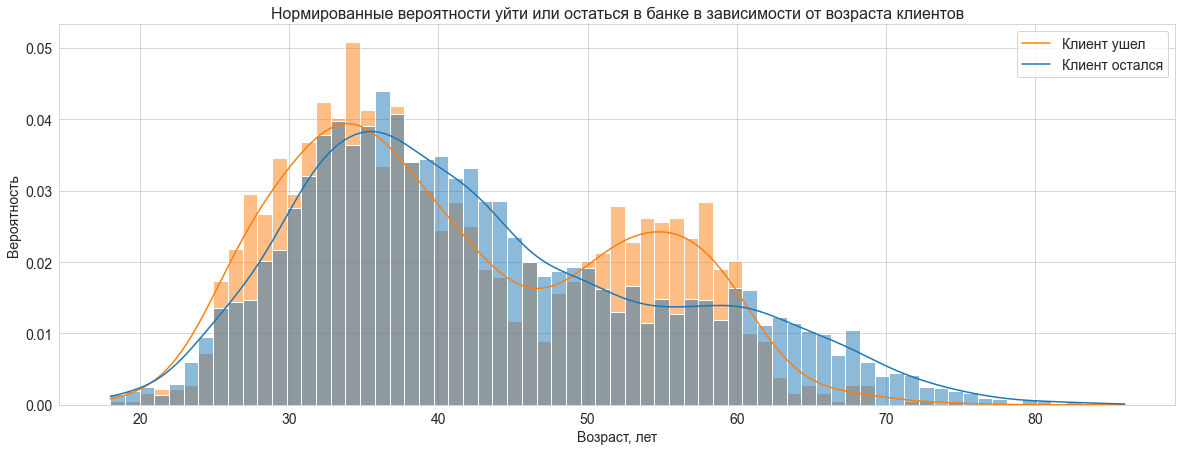

In [49]:
plt.figure(figsize=(20,7))
sns.histplot(data=df, x='age', hue='churn', bins=len(df['age'].unique()), stat='density', fill=True, kde=True, common_norm=False)
plt.title('Нормированные вероятности уйти или остаться в банке в зависимости от возраста клиентов', fontsize=16)
plt.xlabel('Возраст, лет', fontsize=14)
plt.ylabel('Вероятность', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Клиент ушел', 'Клиент остался'], fontsize=14)
plt.show()

**На графике выделяются две области возрастов клиентов, для которых нормированная вероятность уйти оказывается выше чем вероятность остаться - это диапазоны 25-34 года и 50-60 лет включительно. В столбце `age` в датафрейме `df_copy`, отобразим принадлежность клиента к одной из возрастных категорий с повышенным оттоком:**

In [50]:
def age_churn(df):
    if df['age'] <=34 and df['age'] >=25:
        category = '25-34'
    elif df['age'] >=50 and df['age'] <=60:
        category = '50-60'
    else:
        category = 'others'
    return category

In [51]:
df_copy['age'] = df_copy.apply(age_churn, axis=1)

In [52]:
df_copy

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,others,others,25-34,others,59214.82,2-4 продукта,нет кредитной карты,Активен,75719.14,1
1,146556,861.0,others,others,others,3-5 объектов собственности,850594.33,2-4 продукта,others,others,86621.77,0
2,120722,892.0,others,others,25-34,others,NaN,others,others,Активен,107683.34,0
3,225363,866.0,Ярославль,others,50-60,3-5 объектов собственности,1524746.26,2-4 продукта,нет кредитной карты,Активен,174423.53,1
4,157978,730.0,Ярославль,М,25-34,3-5 объектов собственности,174.00,others,others,others,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,others,М,25-34,others,78144.65,others,нет кредитной карты,Активен,18943.64,0
9996,139170,894.0,Ярославль,М,others,others,NaN,others,others,others,196898.29,0
9997,115639,903.0,Ярославль,М,others,others,NaN,2-4 продукта,others,Активен,108905.09,0
9998,148700,777.0,Ярославль,others,others,3-5 объектов собственности,865457.97,2-4 продукта,нет кредитной карты,Активен,86874.90,0


**Рассчитаем процент оттока в выделенных сегментах возрастов, применяя функцию `get_bars` к датафрейму `df_copy`:**

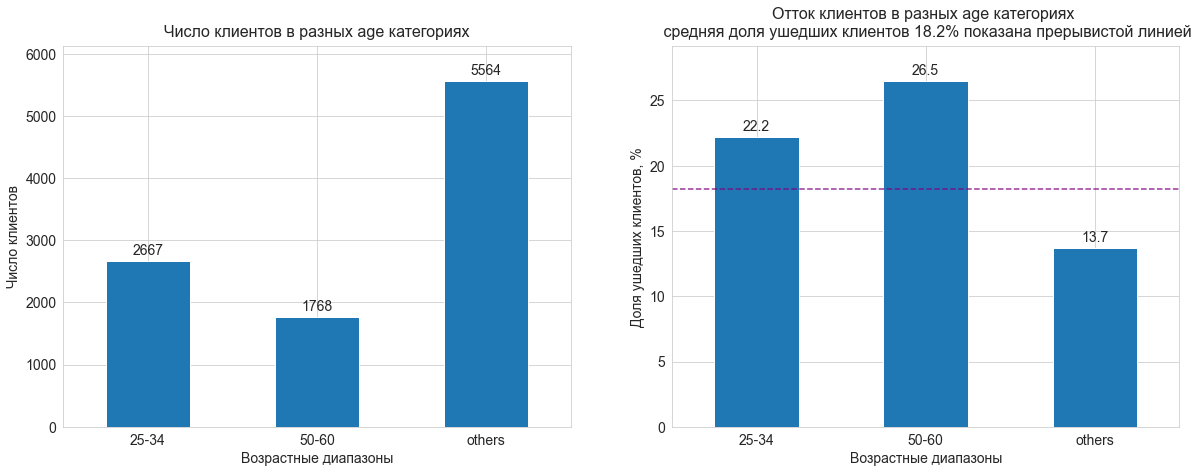


  Возрастные диапазоны  Отток, %  Общее число клиентов
0                25-34      22.2                  2667
1                50-60      26.5                  1768
2               others      13.7                  5564


In [53]:
get_bars('age', df_copy, 'Возрастные диапазоны')

#### Кредитный скоринг

**Построим распределение числа клиентов по кредитному скорингу:**

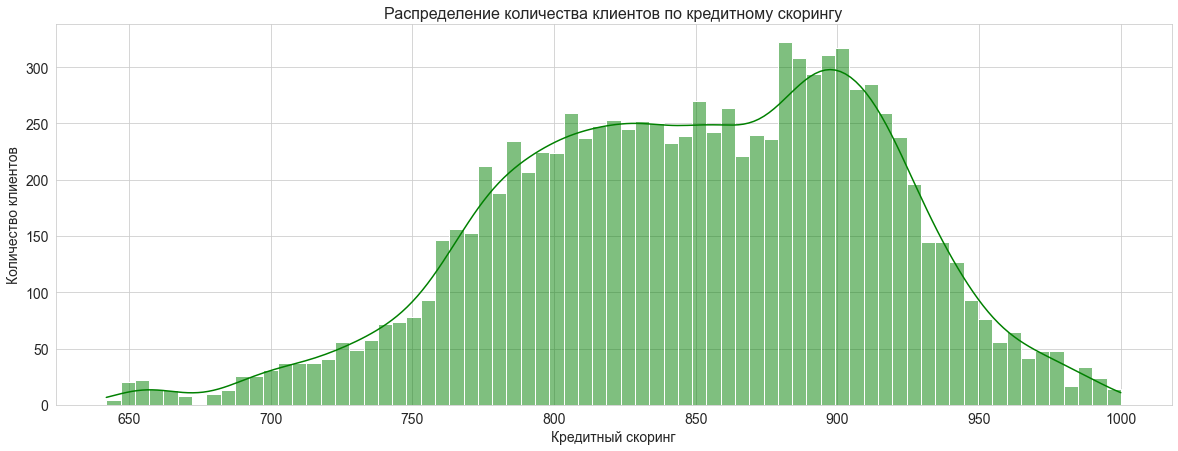

In [54]:
plt.figure(figsize=(20,7))
sns.histplot(data=df, x='score', bins=round(len(df['score'].unique())/5+1), fill=True, kde=True, color='green')
plt.title('Распределение количества клиентов по кредитному скорингу', fontsize=16)
plt.xlabel('Кредитный скоринг', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**Основная масса клиентов имеет кредитный скоринг в диапазоне от 760 до 940 баллов. Теперь псмотрим на гистограммы нормированной вероятности ухода и не-ухода клиента в зависимости от кредитного скоринга:**

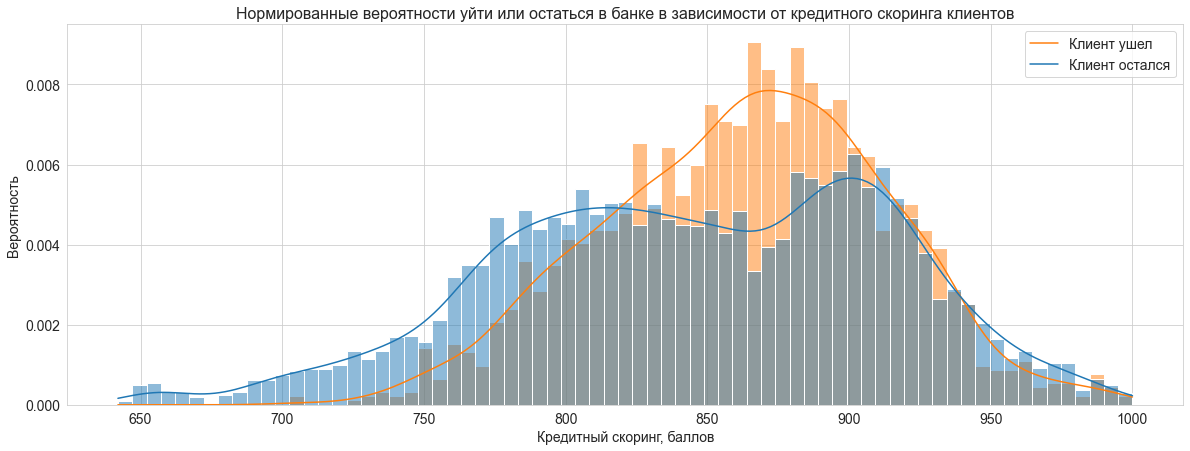

In [55]:
plt.figure(figsize=(20,7))
sns.histplot(data=df, x='score', hue='churn', bins=round(len(df['score'].unique())/5+1), stat='density', fill=True, kde=True, common_norm=False)
plt.title('Нормированные вероятности уйти или остаться в банке в зависимости от кредитного скоринга клиентов', fontsize=16)
plt.xlabel('Кредитный скоринг, баллов', fontsize=14)
plt.ylabel('Вероятность', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Клиент ушел', 'Клиент остался'], fontsize=14)
plt.show()

**Видно, что на графике выделяется диапазон кредитных скорингов от 825 до 900 баллов, в котором клиенты более склонны покидать банк.**

**В столбце `score` отобразим принадлежность клиента к сегменту кредитных скорингов с повышенным оттоком:**

In [56]:
def score_churn(df):
    if df['score'] <=900 and df['score'] >=825:
        category = '825-900'
    else:
        category = 'others'
    return category

In [57]:
df_copy['score'] = df_copy.apply(score_churn, axis=1)

In [58]:
df_copy

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,825-900,others,others,25-34,others,59214.82,2-4 продукта,нет кредитной карты,Активен,75719.14,1
1,146556,825-900,others,others,others,3-5 объектов собственности,850594.33,2-4 продукта,others,others,86621.77,0
2,120722,825-900,others,others,25-34,others,NaN,others,others,Активен,107683.34,0
3,225363,825-900,Ярославль,others,50-60,3-5 объектов собственности,1524746.26,2-4 продукта,нет кредитной карты,Активен,174423.53,1
4,157978,others,Ярославль,М,25-34,3-5 объектов собственности,174.00,others,others,others,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,others,others,М,25-34,others,78144.65,others,нет кредитной карты,Активен,18943.64,0
9996,139170,825-900,Ярославль,М,others,others,NaN,others,others,others,196898.29,0
9997,115639,others,Ярославль,М,others,others,NaN,2-4 продукта,others,Активен,108905.09,0
9998,148700,others,Ярославль,others,others,3-5 объектов собственности,865457.97,2-4 продукта,нет кредитной карты,Активен,86874.90,0


**Рассчитаем вероятность ухода клиентов в выделенных диапазонах кредитных скорингов:**

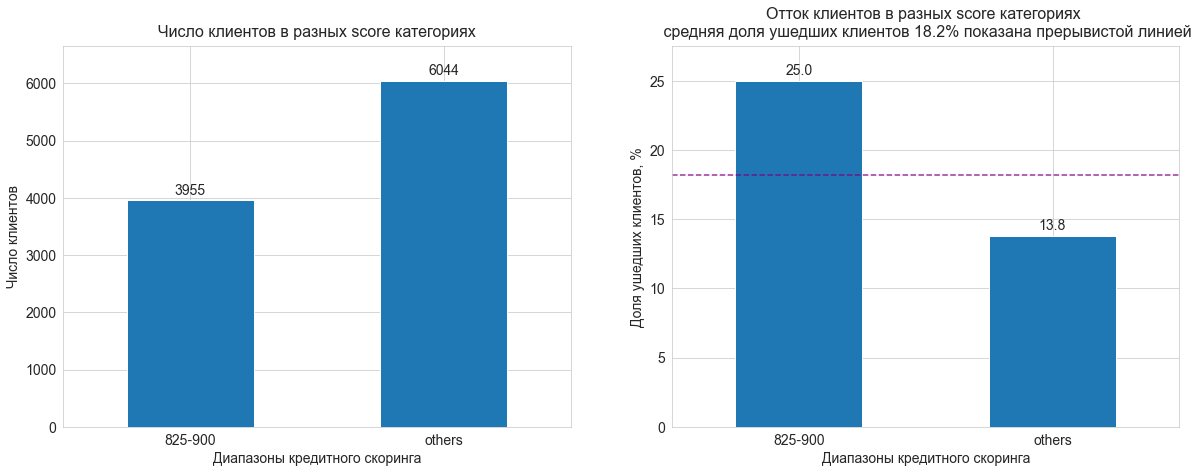


  Диапазоны кредитного скоринга  Отток, %  Общее число клиентов
0                       825-900      25.0                  3955
1                        others      13.8                  6044


In [59]:
get_bars('score', df_copy, 'Диапазоны кредитного скоринга')

#### Баланс на счете

**Посмотрим на распределение клиентов по балансу на счете:**

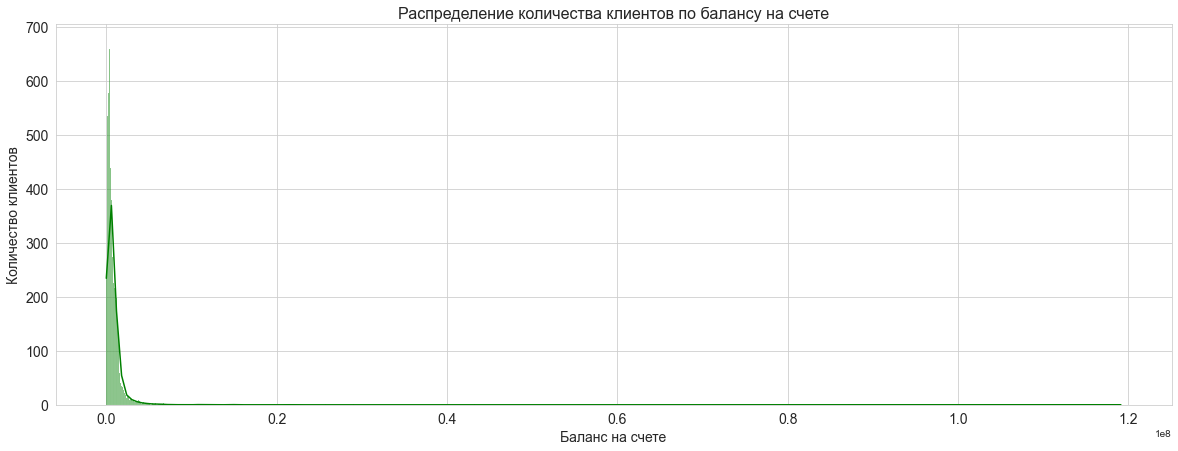

In [60]:
plt.figure(figsize=(20,7))
sns.histplot(data=df, x='balance', fill=True, kde=True, color='green')
plt.title('Распределение количества клиентов по балансу на счете', fontsize=16)
plt.xlabel('Баланс на счете', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**Очевидно, что в выборке присутствуют выраженные выбросы по балансу. Видно, что баланс подавляющего большинства клиентов не превышает 2 млн. Посмотрим статистическое описание данных для столбца `balance`:**

In [61]:
df['balance'].describe()

count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64

**Построим боксплот:**

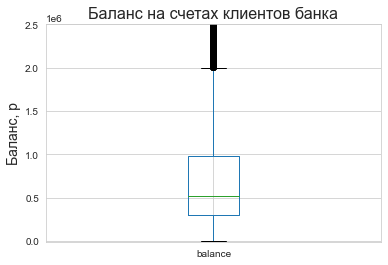

In [62]:
df['balance'].plot(kind='box')
plt.ylim(-10000,2500000)
plt.title('Баланс на счетах клиентов банка', fontsize=16)
plt.ylabel('Баланс, р', fontsize=14)
plt.xlabel('')
plt.show()

**Действительно, видно, что статистические выбросы начинаются с баланса 2 млн. рублей. Посмотрим, сколько таких клиентов в датасете:**

In [63]:
df.query('balance > 2000000')['user_id'].count()

428

**428 клиентов с балансом свыше 2 млн, что составляет более 4% от размера датасета. Не будем удалять их из самого датасета, однако для построения распределения по балансу возьмем лишь тех клиентов, у которых на счету менее 2 млн:**

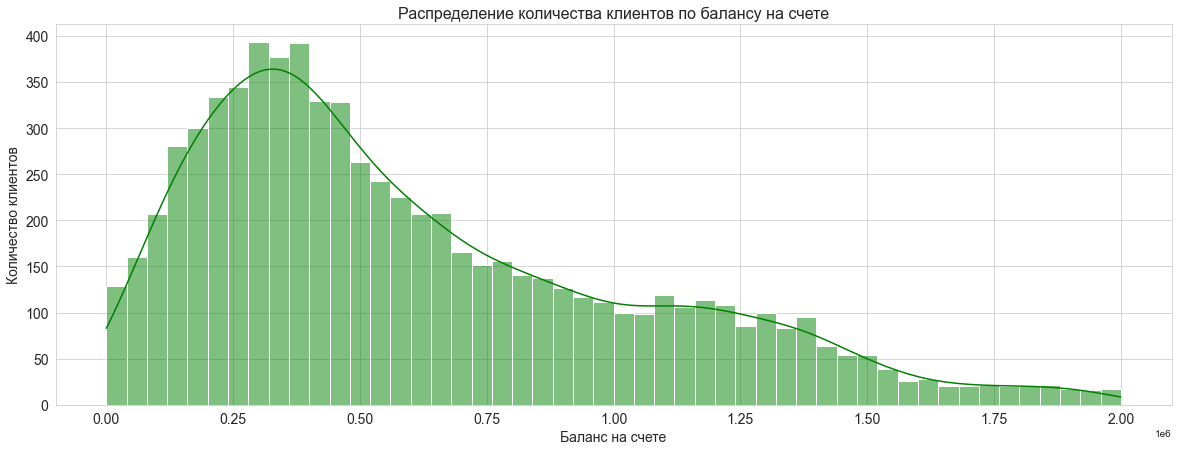

In [64]:
plt.figure(figsize=(20,7))
sns.histplot(data=df.query('balance < 2000000'), x='balance', bins=50, fill=True, kde=True, color='green')
plt.title('Распределение количества клиентов по балансу на счете', fontsize=16)
plt.xlabel('Баланс на счете', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**У большинства клиентов на балансе до 1 млн. Далее посмотрим, пользователи с каким балансом на счете более склонны покидать банк, построив нормированные распределения вероятностей уйти и остаться для клиентов с разным балансом:**

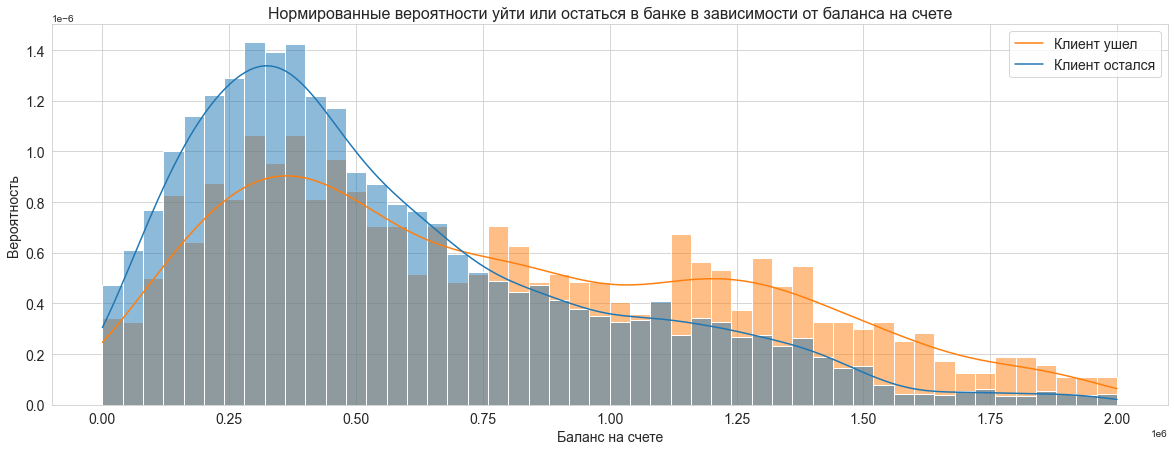

In [65]:
plt.figure(figsize=(20,7))
sns.histplot(data=df.query('balance < 2000000'), x='balance', bins=50, hue='churn', fill=True, kde=True, stat='density', common_norm=False)
plt.title('Нормированные вероятности уйти или остаться в банке в зависимости от баланса на счете', fontsize=16)
plt.xlabel('Баланс на счете', fontsize=14)
plt.ylabel('Вероятность', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Клиент ушел', 'Клиент остался'], fontsize=14)
plt.show()

**Полученный график показывает, что более склонны покидать банк те клиенты, у которых на счету 750 тыс. рублей и более. В столбец `balance` запишем к какому сегменту по балансу на счете в отношении оттока  принадлежит клиент:**

In [66]:
def balance_churn(df):
    if df['balance'] >= 750000:
        category = '>750 тыс'
    else:
        category = 'others'
    return category

In [67]:
df_copy['balance'] = df_copy.apply(balance_churn, axis=1)
df_copy.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,825-900,others,others,25-34,others,others,2-4 продукта,нет кредитной карты,Активен,75719.14,1
1,146556,825-900,others,others,others,3-5 объектов собственности,>750 тыс,2-4 продукта,others,others,86621.77,0
2,120722,825-900,others,others,25-34,others,others,others,others,Активен,107683.34,0
3,225363,825-900,Ярославль,others,50-60,3-5 объектов собственности,>750 тыс,2-4 продукта,нет кредитной карты,Активен,174423.53,1
4,157978,others,Ярославль,М,25-34,3-5 объектов собственности,others,others,others,others,67353.16,1


**Рассчитаем вероятность ухода клиентов в выделенных диапазонах баланса на счете:**

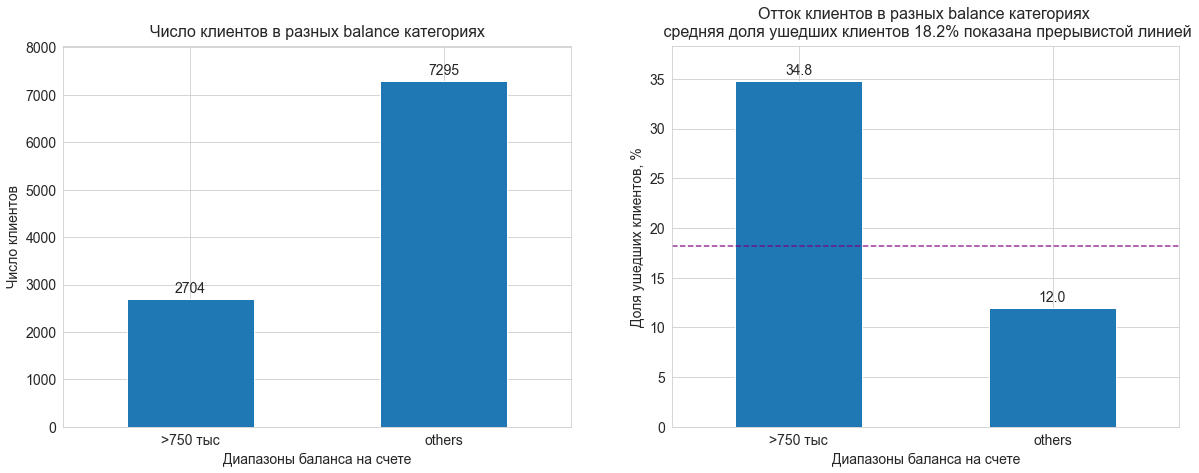


  Диапазоны баланса на счете  Отток, %  Общее число клиентов
0                   >750 тыс      34.8                  2704
1                     others      12.0                  7295


In [68]:
get_bars('balance', df_copy, 'Диапазоны баланса на счете')

#### Ежемесячный доход

**Оценим, как распределены клиенты по величине ежемесячного дохода:**

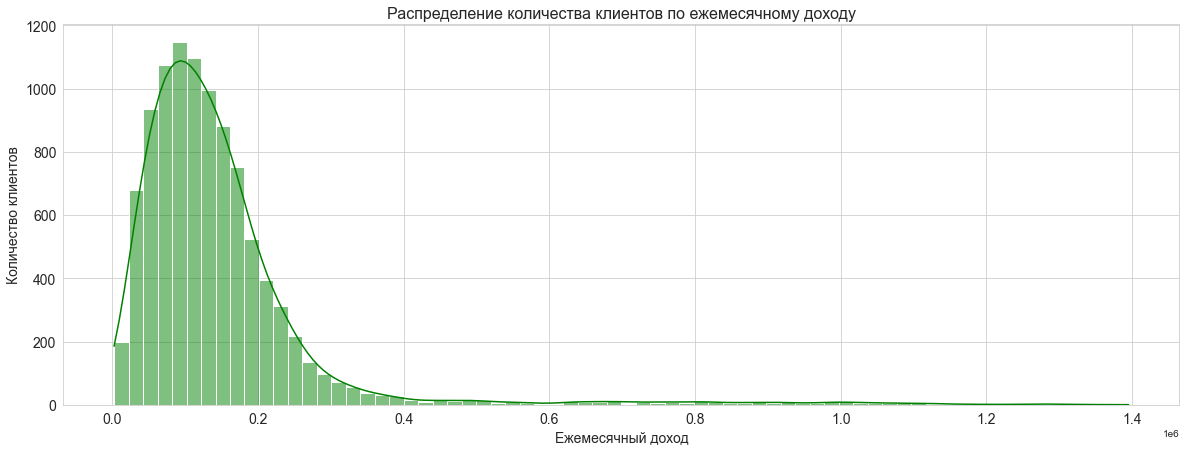

In [69]:
plt.figure(figsize=(20,7))
sns.histplot(data=df, x='est_salary', bins=70, fill=True, kde=True, color='green')
plt.title('Распределение количества клиентов по ежемесячному доходу', fontsize=16)
plt.xlabel('Ежемесячный доход', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [70]:
df['est_salary'].describe()

count    9.999000e+03
mean     1.478792e+05
std      1.393901e+05
min      2.546300e+03
25%      7.525212e+04
50%      1.196615e+05
75%      1.745011e+05
max      1.395064e+06
Name: est_salary, dtype: float64

**Построим боксплот, чтобы оценить границу стат. выбросов:**

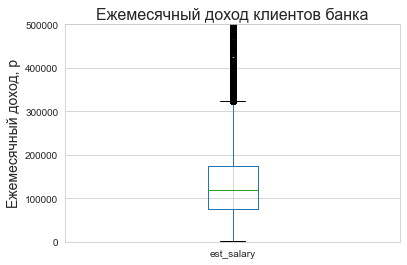

In [71]:
df['est_salary'].plot(kind='box')
plt.ylim(0,500000)
plt.title('Ежемесячный доход клиентов банка', fontsize=16)
plt.ylabel('Ежемесячный доход, р', fontsize=14)
plt.xlabel('')
plt.show()

**Медианный доход составляет около 120 тысяч рублей, 75% всех клиентов имеют ежемесячный доход в пределах 175 тысяч рублей. Клиенты с доходом свыше 320 тыс скорее являются стат. выбросом. Посмотрим, сколько их:** 

In [72]:
round(df.query('est_salary > 320000')['user_id'].count()/df['user_id'].count()*100,1)

5.0

**Пять процентов. Уберем их из выборки, чтобы построить распределения, и оценим, клиенты с каким ежемесячным доходом уходят из банка чаще:**

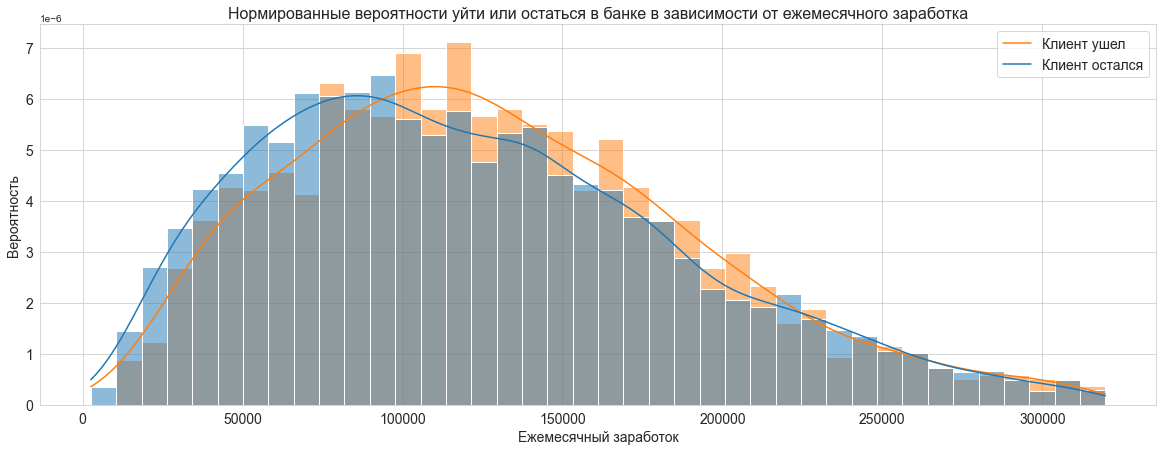

In [73]:
plt.figure(figsize=(20,7))
sns.histplot(data=df.query('est_salary <= 320000'), x='est_salary', bins=40, hue='churn', fill=True, kde=True, stat='density', common_norm=False)
plt.title('Нормированные вероятности уйти или остаться в банке в зависимости от ежемесячного заработка', fontsize=16)
plt.xlabel('Ежемесячный заработок', fontsize=14)
plt.ylabel('Вероятность', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Клиент ушел', 'Клиент остался'], fontsize=14)
plt.show()

**Наиболее склонны покидать банк клиенты, чей ежемесячный доход составляет от 110 до 220 тысяч рублей. Создадим `df_copy` столбец `est_salary` в котором отметим, к какой группе по доходу в разрезе оттока принадлежит клиент:**

In [74]:
def est_salary_churn(df):
    if df['est_salary'] >= 110000 and df['est_salary']<=220000:
        category = '110-220 тыс'
    else:
        category = 'others'
    return category

In [75]:
df_copy['est_salary'] = df_copy.apply(est_salary_churn, axis=1)
df_copy.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,825-900,others,others,25-34,others,others,2-4 продукта,нет кредитной карты,Активен,others,1
1,146556,825-900,others,others,others,3-5 объектов собственности,>750 тыс,2-4 продукта,others,others,others,0
2,120722,825-900,others,others,25-34,others,others,others,others,Активен,others,0
3,225363,825-900,Ярославль,others,50-60,3-5 объектов собственности,>750 тыс,2-4 продукта,нет кредитной карты,Активен,110-220 тыс,1
4,157978,others,Ярославль,М,25-34,3-5 объектов собственности,others,others,others,others,others,1


**Оценим долю уходящих клиентов в выделенных диапазонах ежемесячного дохода:**

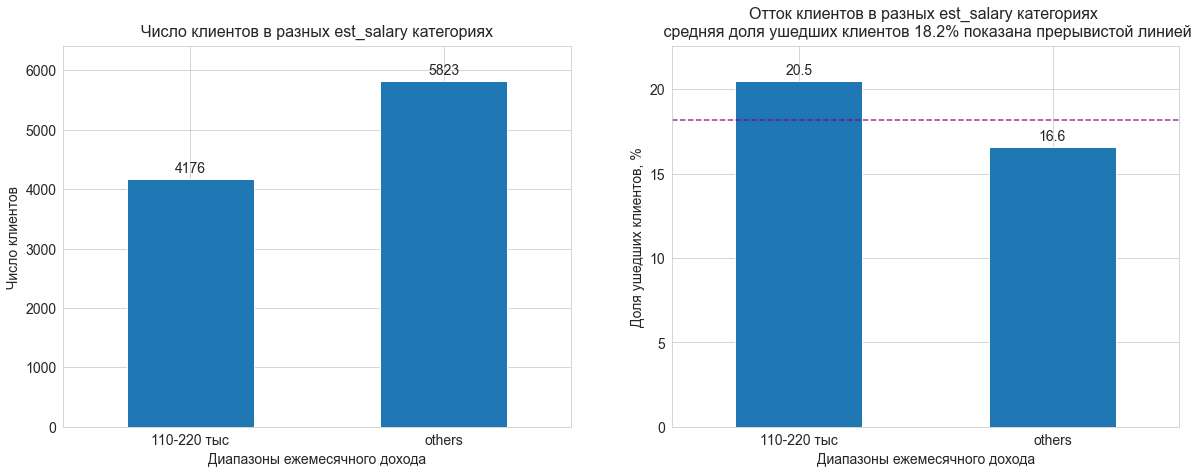


  Диапазоны ежемесячного дохода  Отток, %  Общее число клиентов
0                   110-220 тыс      20.5                  4176
1                        others      16.6                  5823


In [76]:
get_bars('est_salary', df_copy, 'Диапазоны ежемесячного дохода')

### "Портреты" типичных уходящих и остающихся в банке клиентов

**Для описания типичных уходящих и остающихся клиентов создадим таблицу, в которую запишем средние/медианные значения количественных и модальные значения качественных признаков для этих двух групп:**

In [77]:
pivot = df.pivot_table(index='churn', 
               values=['score','city','gender','age', 'equity','products', 'credit_card', 'last_activity', 'est_salary', 'balance'], 
               aggfunc={'score':'mean', 
                        'age':'mean', 
                        'est_salary':'mean',
                        'city':statistics.mode, 
                        'gender':statistics.mode,
                        'equity':np.median,
                        'products':np.median, 
                        'credit_card':statistics.mode, 
                        'last_activity':statistics.mode,
                        'balance':np.median})
pivot.columns = ['средний возраст', 'медианный баланс на счете', 'мода города', 'мода признака наличия кредитной карты', 'медиана числа объектов собственности', 
                 'средняя зарплата', 'мода пола', 'мода признака активности', 'медиана количества продуктов', 'средний кредитный рейтинг']
pivot.index = ['клиент остался', 'клиент ушел']
pivot['средний возраст'] = pivot['средний возраст'].astype('float').round()
pivot['средняя зарплата'] = pivot['средняя зарплата'].astype('float').round()
pivot['средний кредитный рейтинг'] = pivot['средний кредитный рейтинг'].astype('float').round()
pivot['медианный баланс на счете'] = pivot['медианный баланс на счете'].astype('float').round()
pivot

,средний возраст,медианный баланс на счете,мода города,мода признака наличия кредитной карты,медиана числа объектов собственности,средняя зарплата,мода пола,мода признака активности,медиана количества продуктов,средний кредитный рейтинг
клиент остался,43.0,475382.0,Ярославль,1,3,147783.0,Ж,0,2,845.0
клиент ушел,41.0,782410.0,Ярославль,1,4,148311.0,М,1,2,863.0


**Транспонируем полученную таблицу:**

In [78]:
pivot = pivot.T
pivot

,клиент остался,клиент ушел
средний возраст,43.0,41.0
медианный баланс на счете,475382.0,782410.0
мода города,Ярославль,Ярославль
мода признака наличия кредитной карты,1,1
медиана числа объектов собственности,3,4
средняя зарплата,147783.0,148311.0
мода пола,Ж,М
мода признака активности,0,1
медиана количества продуктов,2,2
средний кредитный рейтинг,845.0,863.0


**Создадим дополнительный столбец, в котоый запишем разницу в процентах между оставшимися и ушедшими клиентами для непрерывных и дискретных количественных признаков, а для категориальных признаков поставим прочерк:**

In [79]:
for index in pivot.index: 
    if not index in ['мода города', 'мода признака наличия кредитной карты', 'мода пола', 'мода признака активности']:
        pivot.loc[index,'различия, %'] = round((pivot.loc[index, 'клиент ушел'] - pivot.loc[index, 'клиент остался'])/pivot.loc[index, 'клиент остался']*100,1)
    else:
        pivot.loc[index,'различия, %'] = '-'

In [80]:
display(pivot)

,клиент остался,клиент ушел,"различия, %"
средний возраст,43.0,41.0,-4.7
медианный баланс на счете,475382.0,782410.0,64.6
мода города,Ярославль,Ярославль,-
мода признака наличия кредитной карты,1,1,-
медиана числа объектов собственности,3,4,33.3
средняя зарплата,147783.0,148311.0,0.4
мода пола,Ж,М,-
мода признака активности,0,1,-
медиана количества продуктов,2,2,0.0
средний кредитный рейтинг,845.0,863.0,2.1


**Полученная таблица демонстрирует, что ушедшие клиенты в среднем на два года младше оставшихся (41 и 43 года, различие -4.7%), они имеют на 65% больший баланс на счете (782 тыс и 475 тыс, соответственно), у них на один один объект собственности больше (4 против 3) и на 2% выше средний кредитный скоринг (863 против 845). Типичный уходящий клиент это мужчина, который в последнее время совершал банковские операции, тогда как типичный остающийся клиент - женщина, не совершавшая в последнее время банковских операций. Типичные уходящие и остающиеся клиенты практически не различаются по средней зарплате (в обеих группах это около 148 тыс.рублей), имеют одинаковое медианное число банковских продуктов (2) и живут в одном и том же городе (Ярославль).** 

### Оценка корреляции с признаком оттока

**Для оценки корреляции используем метод Phik, задав в качестве интервальных признаков `score`, `age`, `balance` и `est_salary`:**

In [81]:
phik_overview = df.drop(columns='user_id').phik_matrix(interval_cols=['score','balance','age','est_salary'])

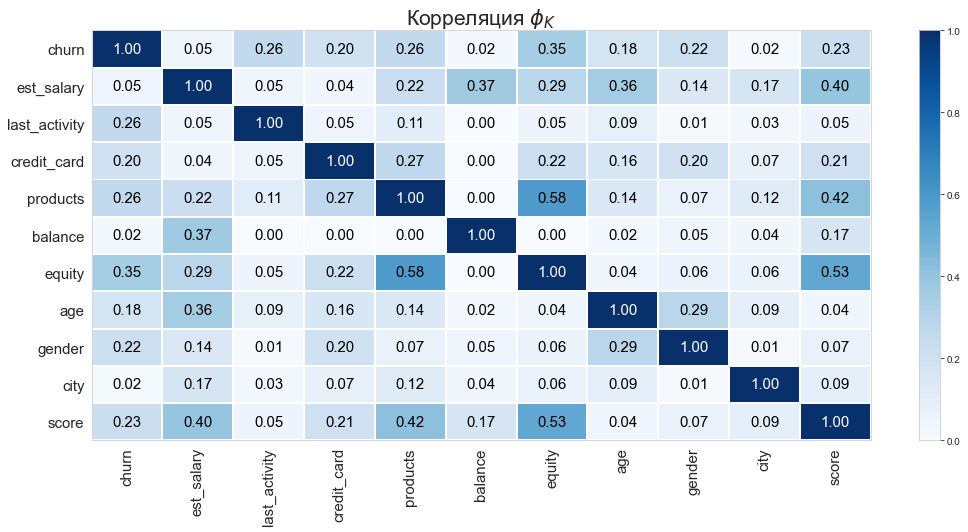

In [82]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'Корреляция $\phi_K$', fontsize_factor=1.5,
                        figsize=(15,7.5))
plt.tight_layout()

**Оценим значимость коэффициентов, рассчитав Z-score:**

In [83]:
significance_overview = df.drop(columns='user_id').significance_matrix(interval_cols=['score','age', 'balance','est_salary'])

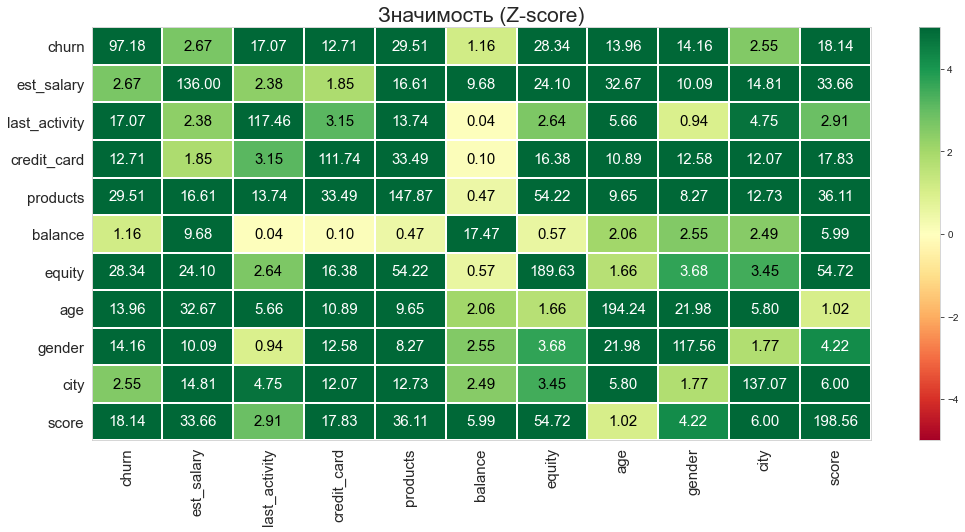

In [84]:
plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='Значимость (Z-score)', 
                        usetex=False, fontsize_factor=1.5, figsize=(15,7.5))
plt.tight_layout()

**Согласно шкале Чеддока - соответствие между коэффициентом корреляции и силой связи двух переменных определяется следующим образом:**

**0 - 0.1 - связь отсутствует,**

**0.1 - 0.3 - слабая связь,**

**0.3 - 0.5 - умеренная связь,**

**0.5 - 0.7 - заметная связь,**

**0.7 - 0.9 - сильная связь,**

**0.9 - 1.0 - очень сильная связь**

**Таким образом, граница между полным отсутствием связи и слабой связью составляет 0.1.**

**Полученные результаты показывают, что показатель оттока демонстрирует умеренную связь (0.35) с числом объектов в собственности (как мы выяснили, у ушедших клиентов оно больше, чем у оставшихся), и слабую связь с  количеством у него банковских продуктов (0.26), признаком активности клиента (0.26), кредитным скорингом (0.23), полом (0.22), признаком наличия/отсутствия кредитной карты (0.20) и возрастом (0.18).**

**Не выявляется связь между оттоком и показателями ежемесячного дохода (0.05), баланса (0.02) и города проживания (0.02).**

## Проверка статистических гипотез

### Гипотеза 1. Ежемесячный доход ушедших и оставшихся клиентов различается

**Перед тем как сформулировать нулевую и альтернативную гипотезу и выборать подходящий статистический тест, посмотрим на распределения доходов в группах ушедших и оставшихся клиентов:**

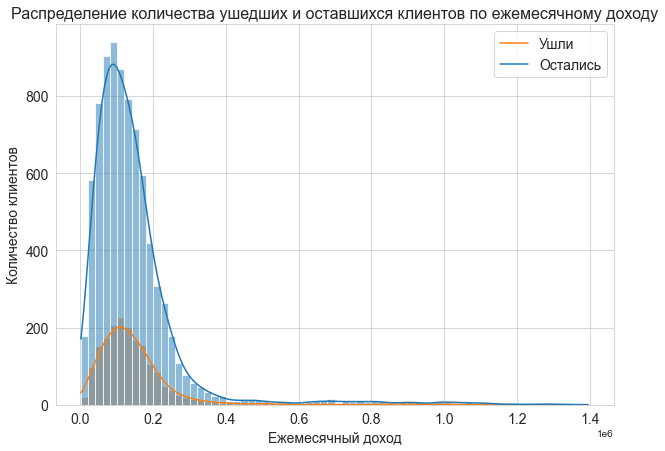

In [85]:
plt.figure(figsize=(10,7))
sns.histplot(data=df, x='est_salary', hue='churn', bins=70, fill=True, kde=True, color='green')
plt.title('Распределение количества ушедших и оставшихся клиентов по ежемесячному доходу', fontsize=16)
plt.xlabel('Ежемесячный доход', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=14)
plt.legend(['Ушли', 'Остались'], fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**Распределения выглядят похоже, и видно, что ушедших меньше, чем оставшихся. У обоих распределений есть выраженные "хвосты". Проверим распределения на нормальность, используя критерий Шапиро-Уилка:**

In [86]:
shapiro(df.query('churn == 1')['est_salary'])

ShapiroResult(statistic=0.6440083980560303, pvalue=0.0)

In [87]:
shapiro(df.query('churn == 0')['est_salary'])

ShapiroResult(statistic=0.6149210929870605, pvalue=0.0)

**В обоих случаях данные распределены НЕ нормально (p<0.05). Однако, поскольку в обеих выборках число наблюдений велико, выборочные средние по ЦПТ будут распределены близко кнормальному распределению. Поэтому для проверки гипотезы выберем двухсторонний t-тест. Гипотезы сформулируем следующим образом: нулевая гипотеза (H0) - средние значения ежемесячного дохода у ушедших и оставшихся клиентов не отличаются друг от друга, альтернативная гипотеза (H1) - средние значения ежемесячного дохода у ушедших и оставшихся клиентов различаются. Поскольку выборки ушедших и оставшихся существенно различаются по размеру, при проверке гипотезы установим параметр `equal_var = False`:**    

In [88]:
st.ttest_ind(df.query('churn == 1')['est_salary'], df.query('churn == 0')['est_salary'], equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=0.16053209039121677, pvalue=0.8724727072323815)

**p-value > 0.05, следовательно мы не можем отвергнуть нулевую гипотезу. Значит, средние значения ежемесячного дохода не различаются в группах ушедших и оставшихся клиентов. Сразу рассчитаем эти значения и стандартные отклонения:**

In [89]:
round(df.pivot_table(index='churn', values='est_salary', aggfunc=['mean','std']))

,mean,std
,est_salary,est_salary
churn,,
0,147783.0,142802.0
1,148311.0,122914.0


### Гипотеза 2. Доли ушедших клиентов в группах с кредитной картой и без кредитной карты значимо различаются

**Чтобы проверитть гипотезу о различии долей применим z-тест для пропорций. Напишем функцию `comparison`, которая будет принимать в качестве аргументов название признака, по которому будет разделяться выборка, и название датафрейма. На выходе данная функция будет строить столбчатую диаграмму, отражающую доли ушедших клиентов в каждой категории и результаты z-теста: p-value и вердикт о наличии/отсутствии достоверных различий между долями. Нулевая гипотеза (H0) - различий между сравниваемыми долями нет, альтернативная гипотеза (H1) - различия между сравниваемыми долями есть.** 

In [90]:
def comparison(que, dataframe):
    pivot = dataframe.pivot_table(index=que, 
                             values=['churn','user_id'], aggfunc={'churn':'mean', 'user_id':'count'})
    print(pivot)
    #pivot['churn'] = round(pivot['churn']*100, 2)
    ax = pivot['churn'].plot(kind='bar', figsize=(7,5))
    for p in ax.patches:
        ax.annotate(s = np.round(p.get_height(), decimals=3),
                xy = (p.get_x()+p.get_width()/2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize = 10)
    plt.title(f'Доля ушедших клиентов в разных {que} категориях', pad=10, fontsize=14)
    plt.xticks(rotation=0)
    plt.ylim(0, pivot['churn'].max()+0.02)
    plt.xlabel('')
    plt.ylabel('Доля', fontsize=12)
    plt.show()
    
    a = list(itertools.combinations(pivot.index, 2))

    for i in range(len(a)):
        total_clients = np.array([pivot.loc[a[i][0],'user_id'],pivot.loc[a[i][1],'user_id']])
        churn_clients = np.array([pivot.loc[a[i][0],'user_id']*pivot.loc[a[i][0],'churn'], 
                                  pivot.loc[a[i][1],'user_id']*pivot.loc[a[i][1],'churn']])
        print(f'Сравнение групп {a[i][0]} и {a[i][1]}:')
        test_stat, pval = proportions_ztest(count = churn_clients, nobs = total_clients, alternative = 'two-sided')
        print(churn_clients, total_clients)
        if pval < 0.05:
            print(f'p-value = {round(pval,5)}, различия достоверны')
        else:
            print(f'p-value = {round(pval,5)}, различия НЕ достоверны')
        print()    

                churn  user_id
credit_card                   
0            0.255399     3195
1            0.147413     6804


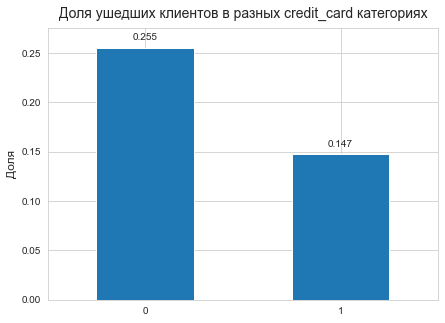

Сравнение групп 0 и 1:
[ 816. 1003.] [3195 6804]
p-value = 0.0, различия достоверны



In [91]:
comparison('credit_card', df)

**Таким образом, различие в долях ушедших клиентов, имеющих среди банковских продуктов кредитную карту и не имеющих кредитной карты, достоверно. Т.е. можно сделать вывод, что наличие кредитки является сильным фактором, "привязывающим" клиента к банку.**

### Гипотеза 3. Доли ушедших клиентов среди мужчин и женщин значимо различаются

**Используя тот же самый критерий, проверим гипотезу о различии долей ушедших клиентов среди мужчин и женщин. H0 - различий в долях уходящих клиентов между группами мужчин и женщин нет, H1 - различия между долями уходящих клиентов в группах мужчин и женщин есть.**

           churn  user_id
gender                   
Ж       0.127353     4994
М       0.236364     5005


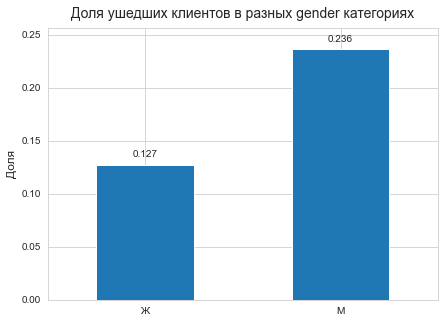

Сравнение групп Ж и М:
[ 636. 1183.] [4994 5005]
p-value = 0.0, различия достоверны



In [92]:
comparison('gender', df)

**p-value < 0.05 - различие в доле уходящих клиентов среди мужчин и женщин статистически достоверно**

## Подведение итогов исследовательского анализа данных и проверки статистических гипотез

**Как итог исследовательского анализа данных, были выделены сегменты по каждому из представленных в изначальном датасете признаков, которые связаны с повышенным оттоком клиентов, а именно:**

1) По городам проживания - Ярославль и Ростов (отток 19.0 и 18.8%);
2) По числу объектов собственности - 3-5 объектов (отток в среднем по диапазону 25.6%);
3) По полу - мужской (отток 23.6 %);
4) По числу банковских продуктов - 2-4 (отток в среднем по диапазону 23.7%);
5) По наличию кредитной карты - кредитная карта отсутствует (отток 25.5%);
6) По активности клиента - активный (24.4%);
7) По возрасту - два сегмента с повышенным оттоком: 25-34 года (отток 22.2%) и 50-60 лет (26.5%);
8) По кредитному скорингу - диапазон 825-900 баллов (отток 25%);
9) По балансу на счете - свыше 750 тысяч рублей (отток 34.8%)
10) По ежемесячному доходу - диапазон 110-220 тысяч рублей (отток 20.5%)

**В результате проверки трех статистических гипотез мы установили следующие факты:**

1) Ежемесячные доходы ушедших и оставшихся пользователей достоверно не различаются и в среднем составляют около 148 тысяч рублей;
2) Доля ушедших клиентов достоверно выше в клиентском сегменте без кредитной карты, чем в сегменте с кредитной картой (25.5% против 14.7%)
3) Доля ушедших клиентов достоверно больше среди мужчин, чем среди женщин (23.6 и 12.7%, соответственно)

**Чтобы среди выделенных сегментов с повышенным оттоком выбрать наиболее важные, подготовим таблицу для приоритизации. В начале создадим объект Series `corr_table` в который запишем величины коэффициентов корреляции всех признаков с показателем оттока:**

In [93]:
corr_table = df.drop(columns='user_id').phik_matrix(interval_cols=['score','balance','age','est_salary'])
corr_table = corr_table.loc['score':'est_salary','churn']
corr_table.name = 'corr_coef'
corr_table

score            0.228260
city             0.017054
gender           0.219184
age              0.183435
equity           0.352737
balance          0.024701
products         0.260106
credit_card      0.202586
last_activity    0.261583
est_salary       0.047767
Name: corr_coef, dtype: float64

**Создадим еще один объект Series `z_corr` в который запишем величины Z-score для полученных коэффициентов корреляции:**

In [94]:
z_corr = df.drop(columns='user_id').phik_matrix(interval_cols=['score','balance','age','est_salary'])
z_corr = z_corr.loc['score':'est_salary','churn']
z_corr.name = 'z-score'
z_corr

score            0.228260
city             0.017054
gender           0.219184
age              0.183435
equity           0.352737
balance          0.024701
products         0.260106
credit_card      0.202586
last_activity    0.261583
est_salary       0.047767
Name: z-score, dtype: float64

**Далее подготовим сводную таблицу `table` в индексах которой будут находиться названия анализируемых признаков, а в столбцах - диапазоны повышенного оттока, число клиентов и доля отточных пользователей в этих диапазонах:**

In [95]:
table = pd.DataFrame()
for column in df_copy.columns[1:-1]:
    piv= df_copy.pivot_table(index=column, values=['user_id', 'churn'], aggfunc={'user_id':'count', 'churn':'mean'}).reset_index()
    piv = piv.rename(columns={column:'que_segment', 'user_id':'num_of_clients', 'churn':'churn'})
    piv['que'] = column
    piv = piv[['que', 'que_segment', 'num_of_clients', 'churn']]
    table = pd.concat([table, piv], axis=0)
table = table.set_index('que')
table = table.query('que_segment != "others"')
table

,que_segment,num_of_clients,churn
que,,,
score,825-900,3955,0.249558
city,Ростов,1417,0.187721
city,Ярославль,5888,0.189708
gender,М,5005,0.236364
age,25-34,2667,0.221597
age,50-60,1768,0.264706
equity,3-5 объектов собственности,5310,0.256497
balance,>750 тыс,2704,0.348003
products,2-4 продукта,6639,0.237385


**Добавим в полученную таблицу коэффициенты корреляции и Z-score, соответствующие каждому из признаков:**

In [96]:
table = table.join(corr_table)
table = table.join(z_corr)
table

,que_segment,num_of_clients,churn,corr_coef,z-score
age,25-34,2667,0.221597,0.183435,0.183435
age,50-60,1768,0.264706,0.183435,0.183435
balance,>750 тыс,2704,0.348003,0.024701,0.024701
city,Ростов,1417,0.187721,0.017054,0.017054
city,Ярославль,5888,0.189708,0.017054,0.017054
credit_card,нет кредитной карты,3195,0.255399,0.202586,0.202586
equity,3-5 объектов собственности,5310,0.256497,0.352737,0.352737
est_salary,110-220 тыс,4176,0.204502,0.047767,0.047767
gender,М,5005,0.236364,0.219184,0.219184
last_activity,Активен,5235,0.244126,0.261583,0.261583


**Таблица для выполнения приоритизации сегментов готова. В следующем пункте выполним приоритизацию сегментов, задав шкалы для количества клиентов, оттока, коэффициентов корреляции и Z-score, а затем проведем разделение на подсегменты, используя наиболее приоритетные сегменты.**

## Приоритизация клиентских сегментов и формирование подсегментов

### Приоритизация сегментов с точки зрения значимости для признака оттока

**Для приоритизации сегментов используем модель, схожую с моделью приоритизации гипотез RICE score. В этой модели приоритет гипотез рассчитывается по формуле: `RICE = reach * impact * confience / efforts`**

    `reach` - показатель охвата,

    `impact` - показатель влияния,
    
    `confidence` - показатель уверенности,
    
    `efforts` - усилия, затрачиваемые на проверку гипотезы.

**Поскольку в нашем случае данные у нас уже есть, то параметр `efforts` мы использовать не будем. В качестве `Reach` используем шкалированную оценку числа клиентов в сегменте (`num_of_clients`), в качестве `impact` - шкалированный показатель оттока `churn`, а вместо `confidence` - шкалированные коэффициент корреляции и Z-score (`corr_coef` и `z-score`).**

**В результате получим следующую формулу: `SCORE = num_of_clients * churn * corr_coef * z-score`** 

**Выполним шкалирование `num_of_clients`, `churn`, `corr_coef`, `z-score` по шкале от 1 до 10, где 1 - минимальное значение, а 10 - максимальное значение встречающееся в данных:**

In [97]:
table['num_of_clients_score'] = pd.cut(table['num_of_clients'], bins = 10, labels = False)+1
table['churn_score'] = pd.cut(table['churn'], bins = 10, labels = False)+1
table['corr_coef_score'] = pd.cut(table['corr_coef'], bins = 10, labels = False)+1
table['z-score_score'] = pd.cut(table['z-score'], bins = 10, labels = False)+1
table

,que_segment,num_of_clients,churn,corr_coef,z-score,num_of_clients_score,churn_score,corr_coef_score,z-score_score
age,25-34,2667,0.221597,0.183435,0.183435,3,3,5,5
age,50-60,1768,0.264706,0.183435,0.183435,1,5,5,5
balance,>750 тыс,2704,0.348003,0.024701,0.024701,3,10,1,1
city,Ростов,1417,0.187721,0.017054,0.017054,1,1,1,1
city,Ярославль,5888,0.189708,0.017054,0.017054,9,1,1,1
credit_card,нет кредитной карты,3195,0.255399,0.202586,0.202586,4,5,6,6
equity,3-5 объектов собственности,5310,0.256497,0.352737,0.352737,8,5,10,10
est_salary,110-220 тыс,4176,0.204502,0.047767,0.047767,6,2,1,1
gender,М,5005,0.236364,0.219184,0.219184,7,4,7,7
last_activity,Активен,5235,0.244126,0.261583,0.261583,8,4,8,8


**Рассчитаем финальный скоринг, перемножив полученные шкалированные значения, и упорядочим таблицу по уменьшению скоринга:**

In [98]:
table['final_score'] = table['num_of_clients_score']*table['churn_score']*table['corr_coef_score']*table['z-score_score']
table = table.sort_values(by='final_score', ascending=False)
table

,que_segment,num_of_clients,churn,corr_coef,z-score,num_of_clients_score,churn_score,corr_coef_score,z-score_score,final_score
equity,3-5 объектов собственности,5310,0.256497,0.352737,0.352737,8,5,10,10,4000
products,2-4 продукта,6639,0.237385,0.260106,0.260106,10,4,8,8,2560
last_activity,Активен,5235,0.244126,0.261583,0.261583,8,4,8,8,2048
gender,М,5005,0.236364,0.219184,0.219184,7,4,7,7,1372
score,825-900,3955,0.249558,0.228260,0.228260,5,4,7,7,980
credit_card,нет кредитной карты,3195,0.255399,0.202586,0.202586,4,5,6,6,720
age,25-34,2667,0.221597,0.183435,0.183435,3,3,5,5,225
age,50-60,1768,0.264706,0.183435,0.183435,1,5,5,5,125
balance,>750 тыс,2704,0.348003,0.024701,0.024701,3,10,1,1,30
est_salary,110-220 тыс,4176,0.204502,0.047767,0.047767,6,2,1,1,12


**В результате получили таблицу признаков, проранжированную по значимости сегмента в оттоке пользователей:** 

**Три наиболее значимых сегмента для оттока:**

- клиенты с 3-5 объектами собственности; 

- клиенты с 2-4 банковскими продуктами;

- клиенты, которые были активны в последнее время;

**Три сегмента с умеренно-высокой значимостью для оттока:**

- клиенты мужского пола (+ подтвердилась гипотеза о том, что мужчины уходят из банка чаще, чем женщины);

- клиенты с кредитным скорингом в диапазоне 825-900;

- клиенты без кредитной карты (+ подтвердилась гипотеза, что клиенты без кредитной карты уходят чаще, чем клиенты с кредиткой);

**Три сегмента с умеренной значимостью для оттока:**

- клиенты в возрвсте 25-34 года;

- клиенты в возрасте 50-60 лет;

- клиенты с балансом свыше 750 тыс;

**Три сегмента наименее значимых с точки зрения оттока:**

- клиенты с доходом 110-220 тыс. рублей в месяц;

- клиенты из Ярославля;

- клиенты из Ростова;

**Отсутствие значимой связи между оттоком и ежемесячным доходом подтверждено отсутствием достоверных различий между доходом уходящих и остающихся клиентов.**

### Формирование подсегментов

**Выберем подсегменты для таргетированных рекомендаций по следующему принципу: создадим датафрейм, содержащий все возможные неповторяющиеся комбинации сегментов (подсегменты), связанных с повышенным оттоком, и рассчитаем в них число клиентов и показатель оттока. Выберем из них те подсегменты, которые продемонстрируют наиболее высокие значения по оттоку и будут содержать не менее 500 пользователей. Малозначимые сегменты использовать не будем, поэтому для начала удалим их из таблицы `table`:**

In [99]:
table = table.drop(index=['city', 'est_salary'])
table

,que_segment,num_of_clients,churn,corr_coef,z-score,num_of_clients_score,churn_score,corr_coef_score,z-score_score,final_score
equity,3-5 объектов собственности,5310,0.256497,0.352737,0.352737,8,5,10,10,4000
products,2-4 продукта,6639,0.237385,0.260106,0.260106,10,4,8,8,2560
last_activity,Активен,5235,0.244126,0.261583,0.261583,8,4,8,8,2048
gender,М,5005,0.236364,0.219184,0.219184,7,4,7,7,1372
score,825-900,3955,0.249558,0.228260,0.228260,5,4,7,7,980
credit_card,нет кредитной карты,3195,0.255399,0.202586,0.202586,4,5,6,6,720
age,25-34,2667,0.221597,0.183435,0.183435,3,3,5,5,225
age,50-60,1768,0.264706,0.183435,0.183435,1,5,5,5,125
balance,>750 тыс,2704,0.348003,0.024701,0.024701,3,10,1,1,30


**Создаем список всех комбинаций:**

In [100]:
combinations = list(itertools.combinations(table['que_segment'],3))
combinations

[('3-5 объектов собственности', '2-4 продукта', 'Активен'),
 ('3-5 объектов собственности', '2-4 продукта', 'М'),
 ('3-5 объектов собственности', '2-4 продукта', '825-900'),
 ('3-5 объектов собственности', '2-4 продукта', 'нет кредитной карты'),
 ('3-5 объектов собственности', '2-4 продукта', '25-34'),
 ('3-5 объектов собственности', '2-4 продукта', '50-60'),
 ('3-5 объектов собственности', '2-4 продукта', '>750 тыс'),
 ('3-5 объектов собственности', 'Активен', 'М'),
 ('3-5 объектов собственности', 'Активен', '825-900'),
 ('3-5 объектов собственности', 'Активен', 'нет кредитной карты'),
 ('3-5 объектов собственности', 'Активен', '25-34'),
 ('3-5 объектов собственности', 'Активен', '50-60'),
 ('3-5 объектов собственности', 'Активен', '>750 тыс'),
 ('3-5 объектов собственности', 'М', '825-900'),
 ('3-5 объектов собственности', 'М', 'нет кредитной карты'),
 ('3-5 объектов собственности', 'М', '25-34'),
 ('3-5 объектов собственности', 'М', '50-60'),
 ('3-5 объектов собственности', 'М', '>7

**Создаем датафрейм `subsegments` с неповторяющимися комбинациями сегментов, связанных с повышенным оттоком, количеством клиентов в каждом подсегменте и оттоком:**

In [101]:
subsegments = pd.DataFrame()
table = table.reset_index()
table = table.rename(columns={'index':'que'})
for i in range(len(combinations)):
    que_segment_1 = combinations[i][0]
    que_1 = table.loc[table['que_segment'] == que_segment_1]['que'].values[0]
    
    que_segment_2 = combinations[i][1]
    que_2 = table.loc[table['que_segment'] == que_segment_2]['que'].values[0]
    
    que_segment_3 = combinations[i][2]
    que_3 = table.loc[table['que_segment'] == que_segment_3]['que'].values[0]
    
    if que_1 == que_2 or que_1 == que_3 or que_2 == que_3:
        continue
    else:
        filtered_table = df_copy.loc[(df_copy[que_1] == que_segment_1) & (df_copy[que_2] == que_segment_2) & (df_copy[que_3] == que_segment_3)]
    num_of_clients = len(filtered_table)
    churn = filtered_table['churn'].mean()
    data=[{'segment_1': que_segment_1, 
           'segment_2': que_segment_2, 
           'segment_3': que_segment_3, 
           'num_of_clients': num_of_clients, 
           'churn': churn}]
    subsegment = pd.DataFrame(columns=['segment_1', 'segment_2', 'segment_3', 'num_of_clients', 'churn'], data=data)
    subsegments = pd.concat([subsegments, subsegment], axis=0)
subsegments = subsegments.reset_index(drop=True)    
display(subsegments)   

,segment_1,segment_2,segment_3,num_of_clients,churn
0,3-5 объектов собственности,2-4 продукта,Активен,2323,0.375807
1,3-5 объектов собственности,2-4 продукта,М,2109,0.370792
2,3-5 объектов собственности,2-4 продукта,825-900,2124,0.321563
3,3-5 объектов собственности,2-4 продукта,нет кредитной карты,1967,0.325369
4,3-5 объектов собственности,2-4 продукта,25-34,1175,0.341277
...,...,...,...,...,...
72,825-900,нет кредитной карты,>750 тыс,556,0.473022
73,825-900,25-34,>750 тыс,209,0.516746
74,825-900,50-60,>750 тыс,309,0.501618
75,нет кредитной карты,25-34,>750 тыс,215,0.632558


**Получили 77 вариантов подсегментов. Исключим из списка подсегменты, в которых меньше 500 клиентов, т.к. это менее 5% общей численности клиентов банка, и даже при высокой эффективности мер, направленных на удержание клиентов этого подсегмента, мы скорее всего не увидим значимого снижения оттока. С другой стороны, подсегменты не должны быть слишком многочисленными - существует риск, что клиенты в них будут разнородны, что не позволит сформировать эффективную стратегию работы с сегментом. Ограничимся диапазоном численности подсегментов 500-1500 человек:** 

In [102]:
subsegments = subsegments.query('num_of_clients >= 500 and num_of_clients <= 1500').reset_index(drop=True)
subsegments = subsegments.sort_values(by='churn', ascending=False).reset_index(drop=True)
subsegments

,segment_1,segment_2,segment_3,num_of_clients,churn
0,Активен,М,>750 тыс,708,0.597458
1,Активен,нет кредитной карты,>750 тыс,666,0.569069
2,Активен,825-900,>750 тыс,658,0.565350
3,М,нет кредитной карты,>750 тыс,570,0.559649
4,2-4 продукта,Активен,>750 тыс,1254,0.504785
5,М,825-900,>750 тыс,622,0.488746
6,3-5 объектов собственности,Активен,>750 тыс,1231,0.485784
7,2-4 продукта,М,>750 тыс,1185,0.477637
8,Активен,825-900,нет кредитной карты,826,0.474576
9,825-900,нет кредитной карты,>750 тыс,556,0.473022


**Из оставшихся подсегментов выделим те, которые не пересекаются по сегментам, лежащим в их основе, имеют отток не ниже 36.4% (т.е. более чем в два раза превышают средний отток по всему датасету):**

1. Клиенты в возрасте 25-34 года, имеющие 2-4 банковских продукта, без кредитки (628 человек, отток 41%).

2. Клиенты в возрасте 50-60 лет, с балансом выше 750 тыс и 3-5 объектами собственности (538 человек, отток 44%).

3. Активные клиенты-мужчины с кредитным скорингом 825-900 баллов (925 человек, отток 45%).

**Далее в выводах сформируем рекомендации для отдела маркетинга о том, как удержать клиентов в выделенных подсегментах**

## Выводы и рекомендации для отдела маркетинга

### "Портреты" уходящих и остающихся клиентов

**Во-первых, исследование позволило сформировать типичные портреты клиентов, которые уходят из банка и остаются в нем. Они представлены в таблице:**

In [103]:
display(pivot)

,клиент остался,клиент ушел,"различия, %"
средний возраст,43.0,41.0,-4.7
медианный баланс на счете,475382.0,782410.0,64.6
мода города,Ярославль,Ярославль,-
мода признака наличия кредитной карты,1,1,-
медиана числа объектов собственности,3,4,33.3
средняя зарплата,147783.0,148311.0,0.4
мода пола,Ж,М,-
мода признака активности,0,1,-
медиана количества продуктов,2,2,0.0
средний кредитный рейтинг,845.0,863.0,2.1


**Ушедшие клиенты в среднем на два года младше оставшихся (41 и 43 года, различие -4.7%), они имеют на 65% больший баланс на счете (782 тыс и 475 тыс, соответственно), у них на один один объект собственности больше (4 против 3) и на 2% выше средний кредитный скоринг (863 против 845).** 

**Типичный уходящий клиент это мужчина, который в последнее время совершал банковские операции, тогда как типичный остающийся клиент - женщина, не совершавшая в последнее время банковских операций.** 

**Типичные уходящие и остающиеся клиенты практически не различаются по средней зарплате (в обеих группах это около 148 тыс.рублей), имеют одинаковое медианное число банковских продуктов (2) и живут в одном и том же городе (Ярославль).** 

### Результаты проверки статистических гипотез

**В ходе исследования было проверено три гипотезы, которые позволили установить следующие факты:**

1. Средний ежемесячный доход уходящих и остающихся клиентов достоверно не различается и составляет около 148 тысяч рублей.

2. Процент ушедших клиентов достоверно выше в группе клиентов, у которых нет кредитной карты, по сравнению с клиентами у которых есть кредитная карта (25.5 и 14.7%, соответственно). Такой результат указывает на то, что для удержания клиентов банку следует более активно предлагать клиентам, у которых еще нет кредитной карты, оформить ее.

3. Процент ушедших клиентов среди мужчин достоверно выше чем среди женщин (23.6 и 12.7%, соответственно).

### Клиентские подсегменты для таргетированной работы на снижение оттока

**В результате проведенного исследования был сформирован список из 47 клиентских подсегментов, в которых показатели оттока клиентов наиболее высоки. Из этого списка были выбраны 3 подсегмента с высоким уровнем оттока, которые не пересекаются ни по одному сегменту:**

1. Клиенты в возрасте 25-34 года, имеющие 2-4 банковских продукта, без кредитки (628 человек, отток 41%).

2. Клиенты в возрасте 50-60 лет, с балансом выше 750 тыс и 3-5 объектами собственности (538 человек, отток 44%).

3. Активные клиенты-мужчины с кредитным скорингом 825-900 баллов (925 человек, отток 45%).

**Ниже приведем рекомендации, которые должны помочь удержать клиентов в выделенных подсегментах:**

1. **Для подсегмента 1 (клиенты с 2-4 банковскими продуктами, в возрасте 25-34 года, без кредитки).** Клиенты с таким профилем - это люди, среди которых есть молодые родители/люди увлекающиеся спортом (или имеющие другие хобби)/получающие образование/заинтересованные в потреблении товаров и услуг. Такому клиентскому сегменту можно предложить кредитную карту с длительным беспроцентным периодом с самой простой мотивацией - осуществить свои мечты (дом/хобби/увлечения/образование/путешествия). Среди этого подсегмента клиентов может быть востребовано ипотечное кредитование, поэтому можно напомнить через банковское приложение о возможности взять ипотеку в банке. Также можно предложить повышенный кэшбэк по дебетовой карте в одной или нескольких из интересующих категорий при условии некоторых минимальных трат по карте каждый месяц. Предложить открыть накопительный счет/вклад для создания "подушки безопасности", чтобы откладывать деньги на образование для детей или на отдых/ремонт и т.п. Предложить оформить договор брокерского обслуживания с целью долговременных инвестиций для формирования капитала. 

2. **Для подсегмента 2 (баланс выше 750 тысяч рублей, 3-5 объектов собственности, возраст 50-60 лет).** Судя по описанию подсегмента, это состоятельные люди в предпенсионном возрасте. Для них приоритетом может быть сохранение/увеличение объема финансовых накоплений перед завершением трудовой деятельности, а также сохранение/защита имеющихся объектов собственности. Таких клиентов стоит уведомить о том, что банк предлагает услуги страхования (если есть: страхование здоровья, жилья, автострахование). Если существует такая возможность, предложить клиентам повышение ставки по долговременному депозиту (цель - сохранение накоплений) при оформлении договора страхования. Можно предложить брокерское обслуживание (инвестиции в низкорисковые ценные бумаги - облигации, инвестиционные фонды с невысоким риском).    

3. **Для подсегмента 3 (активные клиенты-мужчины, имеющие кредитный скоринг 825-900 баллов).** Руководствуясь величиной кредитного скоринга клиента, в банковском приложении можно отобразить сумму кредита, на которую может претендовать клиент в данном банке. Предложить открытие металлического или мультвалютного счета. Предложить дебетовую карту с повышенным кэшбеком на товары/услуги, которыми часто пользуются мужчины - например на автотовары/АЗС/товары для спорта/технику.        